# Описание проекта
## Вырабатываем стратегию по борьбе с оттоком посетителей из сети фитнес клубов.

## Описание данных проекта
`Churn` — факт оттока клиентов в текущем месяце; 

### Текущие поля в датасете:  

Данные клиента за предыдущий до проверки факта оттока месяц:  
`gender` — пол;  
`Near_Location` — проживание или работа в районе, где находится фитнес-центр;  
`Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);  
`Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);  
`Phone` — наличие контактного телефона;  
`Age` — возраст;  
`Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах).

### Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:

`Contract_period` — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);  
`Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);  
`Group_visits` — факт посещения групповых занятий;  
`Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;  `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;  
`Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

### Ссылки на основные действия <a id="cell129"></a>
1. [Разворачиваем матрицу .transpose()](#cell1)
2. [Управление шириной заголовков таблицы](#cell2)
3. [Меняем символы в названиеиях колонок](#cell2)
4. [Тепловая карта настройки](https://datastart.ru/blog/read/seaborn-heatmaps-13-sposobov-nastroit-vizualizaciyu-matricy-korrelyacii)
5. [График распределения и диаграммы seaborn.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=sns%20pairplot)
6. [График распределения и диаграммы seaborn.pairplot разделитель HUE должен быть не числовой](#cell0)
7. [Разворачиваем таблицу](#cell6)
8. [Функция для вывода метрик обучающих моделей](#cell7)
9. [Преобразовываем Series в DataFrame на примере value_counts()](#cell9)
10. [Меняем название ячеек в столбце](#cell10)
11. [Диаграмма sns.scatterplot ](#cell11)
12. [Диаграммы sns.barplot](#cell12)
13. [](#cell13)
14. [](#cell14)
15. [](#cell15)
16. [](#cell16)
___________________________________________

In [1]:
import pandas as pd
from scipy import stats as st
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
from pymystem3 import Mystem
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter
import plotly.express as px
import numpy as np
import seaborn as sns
import math
import os
import datetime as dt
from plotly import graph_objects as go

import math as mth
#qfrom pandas_profiling import ProfileReport 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
%matplotlib inline

# для полного отображения содержимого столбцов
pd.set_option('display.max_colwidth', -1)
# импорт sklearn и ее методов/алгоритмов
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import roc_auc_score
from sklearn.metrics import silhouette_score

### Загружаем данные, даем возможность загрузится как с жесткого диска так и с тренажера

In [2]:
try:
    df = pd.read_csv('C:\\Users\\User\\Downloads\\gym_churn.csv')
   
    
except:
    df = pd.read_csv('/datasets/gym_churn.csv')
    

### Анализируем Data Frame
https://towardsdatascience.com/sweetviz-automated-eda-in-python-a97e4cabacde

In [3]:
# import sweetviz as sv
# advert_report = sv.analyze(df)
# advert_report.show_html('Advertising.html')


## 1. Проведем исследовательский анализ данных

**Посмотрим общую информацию**

In [4]:
def total_info(df, name_list):
    print('Название колонок таблицы', name_list)
    print()
    display(df.columns) # название колонок
    print('___________________________________________')
    print('Cтруктура таблицы', name_list)
    print('___________________________________________')
    display(df.head())# структуру таблицы
    print('___________________________________________')
    print('Общая информация Info таблицы', name_list)
    print('___________________________________________')
    display(df.info())# состав таблицы, формат столбцов, наличие пустых строк
    print('___________________________________________')
    print('Общая информация describe таблицы', name_list)
    print('___________________________________________')
    display(df.describe())# используются для просмотра некоторых основных статистических данных, 
    # таких как процентиль, среднее значение, стандартное отклонение и т. Д.
    print('___________________________________________')
    print('Hаличие нулевых обьектов в таблице', name_list)
    print('___________________________________________')
    display(df.isnull().sum()) # наличие нулевых обьектов
    print('___________________________________________')
    print('Наличие пропусков в таблице' , name_list)
    print('___________________________________________')
    display(df.isna().sum())# наличие пропусков
    print('___________________________________________')
    print('Hаличие дубликатов в таблице' , name_list)
    print('___________________________________________')
    display(df.duplicated().sum()) # наличие дубликатов

In [5]:
total_info(df, 'Фитнес клуб')

Название колонок таблицы Фитнес клуб



Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Contract_period', 'Group_visits', 'Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'Churn'], dtype='object')

___________________________________________
Cтруктура таблицы Фитнес клуб
___________________________________________


gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  Churn
0  1       1              1        1              0      6                1             29   14.227470                     5.0                    3         0.020398                   0.000000                           0    
1  0       1              0        0              1      12               1             31   113.202938                    12.0                   7         1.922936                   1.910244                           0    
2  0       1              1        0              1      1                0             28   129.448479                    1.0                    2         1.859098                   1.736502                           0    
3  0       1              1        1              1      12               1             33   62.669863                     12.0                   2         3.205633                   3.357215                           0    
4  1       1              1        1              1      1                0             26   198.362265                    1.0                    3         1.113884                   1.120078                           0

___________________________________________
Общая информация Info таблицы Фитнес клуб
___________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn         

None

___________________________________________
Общая информация describe таблицы Фитнес клуб
___________________________________________


gender  Near_Location      Partner  Promo_friends        Phone  Contract_period  Group_visits          Age  Avg_additional_charges_total  Month_to_end_contract     Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month        Churn
count  4000.000000  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000      4000.000000   4000.000000  4000.000000                   4000.000000            4000.000000  4000.000000                4000.000000                        4000.000000
mean   0.510250     0.845250       0.486750     0.308500       0.903500     4.681250         0.412250      29.184250    146.943728                    4.322750               3.724750     1.879020                   1.767052                           0.265250   
std    0.499957     0.361711       0.499887     0.461932       0.295313     4.549706         0.492301      3.258367     96.355602                     4.191297               3.749267     0.972245                   1.052906                           0.441521   
min    0.000000     0.000000       0.000000     0.000000       0.000000     1.000000         0.000000      18.000000    0.148205                      1.000000               0.000000     0.000000                   0.000000                           0.000000   
25%    0.000000     1.000000       0.000000     0.000000       1.000000     1.000000         0.000000      27.000000    68.868830                     1.000000               1.000000     1.180875                   0.963003                           0.000000   
50%    1.000000     1.000000       0.000000     0.000000       1.000000     1.000000         0.000000      29.000000    136.220159                    1.000000               3.000000     1.832768                   1.719574                           0.000000   
75%    1.000000     1.000000       1.000000     1.000000       1.000000     6.000000         1.000000      31.000000    210.949625                    6.000000               5.000000     2.536078                   2.510336                           1.000000   
max    1.000000     1.000000       1.000000     1.000000       1.000000     12.000000        1.000000      41.000000    552.590740                    12.000000              31.000000    6.023668                   6.146783                           1.000000

___________________________________________
Hаличие нулевых обьектов в таблице Фитнес клуб
___________________________________________


gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

___________________________________________
Наличие пропусков в таблице Фитнес клуб
___________________________________________


gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

___________________________________________
Hаличие дубликатов в таблице Фитнес клуб
___________________________________________


0

**С данными все нормально приведем название колонок к нижнему регистру для удобства**

In [6]:
df.columns = df.columns.str.lower()

In [7]:
display(df.head())

gender  near_location  partner  promo_friends  phone  contract_period  group_visits  age  avg_additional_charges_total  month_to_end_contract  lifetime  avg_class_frequency_total  avg_class_frequency_current_month  churn
0  1       1              1        1              0      6                1             29   14.227470                     5.0                    3         0.020398                   0.000000                           0    
1  0       1              0        0              1      12               1             31   113.202938                    12.0                   7         1.922936                   1.910244                           0    
2  0       1              1        0              1      1                0             28   129.448479                    1.0                    2         1.859098                   1.736502                           0    
3  0       1              1        1              1      12               1             33   62.669863                     12.0                   2         3.205633                   3.357215                           0    
4  1       1              1        1              1      1                0             26   198.362265                    1.0                    3         1.113884                   1.120078                           0

### Посмотрим на датасет: есть ли в нем отсутствующие признаки, изучим средние значения и стандартные отклонения (пригодится метод describe());<a id="cell2"></a>


In [8]:
# управление шириной заголовков
#df.columns = [x.replace('_', ' ') for x in df.columns] # меняем символы в название иях колонок

#df.style.set_table_styles([dict(selector="th", props=[('max=width', '20px')])])
#display(df.head())

**Построим гистограммы по наиболее интересным колонкам датасета** 

In [9]:
# создадим список колонок 
list_columns = df.columns.tolist()
display(list_columns[:-1])

['gender',
 'near_location',
 'partner',
 'promo_friends',
 'phone',
 'contract_period',
 'group_visits',
 'age',
 'avg_additional_charges_total',
 'month_to_end_contract',
 'lifetime',
 'avg_class_frequency_total',
 'avg_class_frequency_current_month']

**Посмотрим на соотношение мужчин и женщин в общем количестве клиентов**  <a id="cell9"></a>

In [10]:
df_gender = df['gender'].value_counts()
display(type(df_gender))
df_gender = pd.DataFrame(df_gender)
df_gender = df_gender.reset_index()
df_gender.columns = ['gender', 'counts']
display(df_gender.head())


pandas.core.series.Series

gender  counts
0  1       2041  
1  0       1959

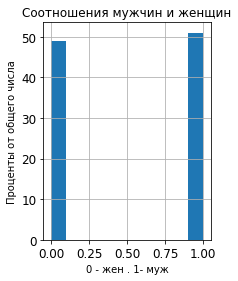

In [11]:
plt.figure(figsize=(3, 4))
df['gender'].plot.hist(weights = np.ones_like(df.index) / len(df.index)*100,  fontsize=12, grid=True)
plt.title('Соотношения мужчин и женщин')
plt.xlabel("0 - жен . 1- муж")
plt.ylabel("Проценты от общего числа");
    


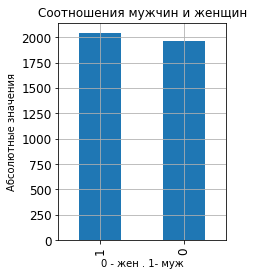

In [12]:
df['gender'].value_counts().plot(kind='bar', figsize=(3, 4), fontsize=12, grid=True)
plt.title('Соотношения мужчин и женщин')
plt.xlabel("0 - жен . 1- муж")
plt.ylabel("Абсолютные значения");
    

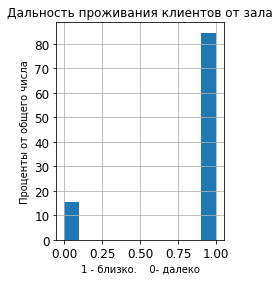

In [13]:
plt.figure(figsize=(3, 4))
df['near_location'].plot.hist(weights = np.ones_like(df.index) / len(df.index)*100,  fontsize=12, grid=True)
plt.title('Дальность проживания клиентов от зала')
plt.xlabel("1 - близко.    0- далеко")
plt.ylabel("Проценты от общего числа");
    


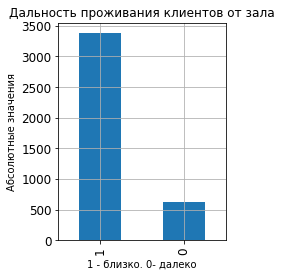

In [14]:
df['near_location'].value_counts().plot(kind='bar',   figsize=(3, 4), fontsize=12, grid=True)
plt.title('Дальность проживания клиентов от зала')
plt.xlabel("1 - близко. 0- далеко")
plt.ylabel("Абсолютные значения");
    

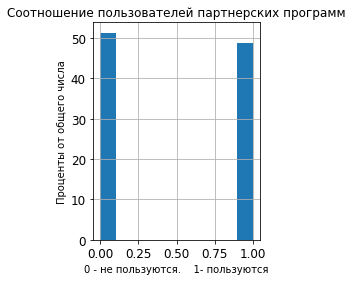

In [15]:
plt.figure(figsize=(3, 4))
df['partner'].plot.hist(weights = np.ones_like(df.index) / len(df.index)*100,  fontsize=12, grid=True)
plt.title('Соотношение пользователей партнерских программ')
plt.xlabel("0 - не пользуются.    1- пользуются")
plt.ylabel("Проценты от общего числа");

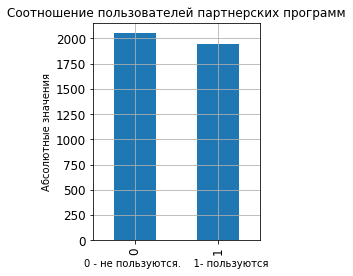

In [16]:
df['partner'].value_counts().plot(kind='bar',  legend='', figsize=(3, 4), fontsize=12, grid=True)
plt.title('Соотношение пользователей партнерских программ')
plt.xlabel("0 - не пользуются.    1- пользуются")
plt.ylabel("Абсолютные значения");
    

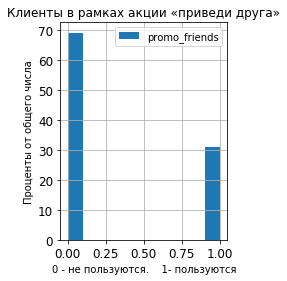

In [17]:
plt.figure(figsize=(3, 4))
df['promo_friends'].plot.hist(weights = np.ones_like(df.index) / len(df.index)*100, legend='телефоны', fontsize=12, grid=True)
plt.title('Клиенты в рамках акции «приведи друга»')
plt.xlabel("0 - не пользуются.    1- пользуются")
plt.ylabel("Проценты от общего числа");

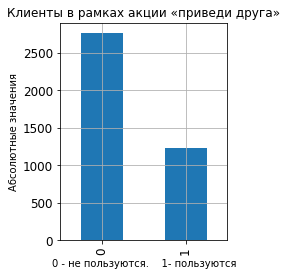

In [18]:
df['promo_friends'].value_counts().plot(kind='bar',   figsize=(3, 4), fontsize=12, grid=True)
plt.title('Клиенты в рамках акции «приведи друга»')
plt.xlabel("0 - не пользуются.    1- пользуются")
plt.ylabel("Абсолютные значения");
    

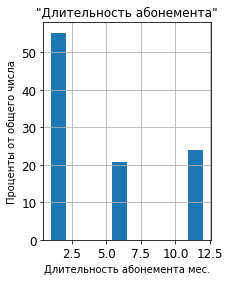

In [19]:
plt.figure(figsize=(3, 4))
df['contract_period'].plot.hist(weights = np.ones_like(df.index) / len(df.index)*100,  fontsize=12, grid=True)
plt.title('"Длительность абонемента"')
plt.xlabel("Длительность абонемента мес.")
plt.ylabel("Проценты от общего числа");
    

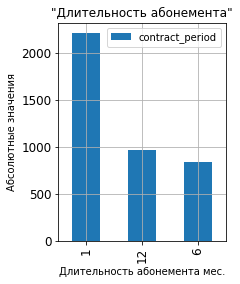

In [20]:
df['contract_period'].value_counts().plot(kind='bar',  legend='телефоны', figsize=(3, 4), fontsize=12, grid=True)
plt.title('"Длительность абонемента"')
plt.xlabel("Длительность абонемента мес.")
plt.ylabel("Абсолютные значения");
    

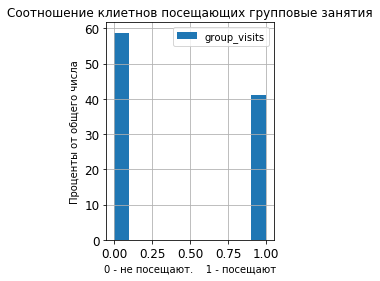

In [21]:
plt.figure(figsize=(3, 4))
df['group_visits'].plot.hist(weights = np.ones_like(df.index) / len(df.index)*100, legend='телефоны', fontsize=12, grid=True)
plt.title('Соотношение клиетнов посещающих групповые занятия')
plt.xlabel("0 - не посещают.    1 - посещают")
plt.ylabel("Проценты от общего числа");
    

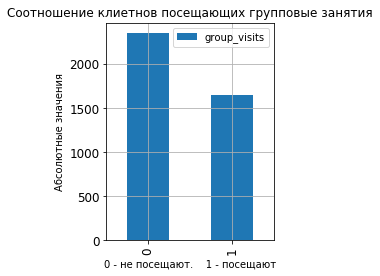

In [22]:
df['group_visits'].value_counts().plot(kind='bar',  legend='телефоны', figsize=(3, 4), fontsize=12, grid=True)
plt.title('Соотношение клиетнов посещающих групповые занятия')
plt.xlabel("0 - не посещают.    1 - посещают")
plt.ylabel("Абсолютные значения");

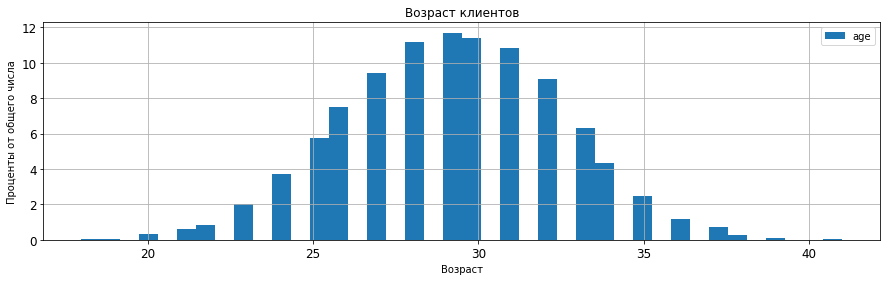

In [23]:
plt.figure(figsize=(15, 4))
df['age'].plot.hist(bins=40, weights = np.ones_like(df.index) / len(df.index)*100, legend='телефоны', fontsize=12, grid=True)
plt.title('Возраст клиентов')
plt.xlabel("Возраст")
plt.ylabel("Проценты от общего числа");

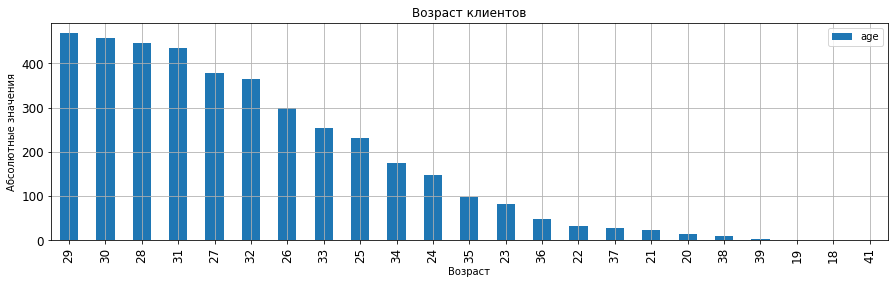

In [24]:
plt.figure(figsize=(15, 4))
df['age'].value_counts().plot(kind='bar',  legend='телефоны', figsize=(15, 4), fontsize=12, grid=True)
plt.title('Возраст клиентов')
plt.xlabel("Возраст")
plt.ylabel("Абсолютные значения");

**Посмотрим на сам датасет и развернем таблицу для удобства**<a id="cell1"></a>

In [25]:
df.describe().transpose()

count        mean        std        min        25%         50%         75%         max
gender                             4000.0  0.510250    0.499957   0.000000   0.000000   1.000000    1.000000    1.000000  
near_location                      4000.0  0.845250    0.361711   0.000000   1.000000   1.000000    1.000000    1.000000  
partner                            4000.0  0.486750    0.499887   0.000000   0.000000   0.000000    1.000000    1.000000  
promo_friends                      4000.0  0.308500    0.461932   0.000000   0.000000   0.000000    1.000000    1.000000  
phone                              4000.0  0.903500    0.295313   0.000000   1.000000   1.000000    1.000000    1.000000  
contract_period                    4000.0  4.681250    4.549706   1.000000   1.000000   1.000000    6.000000    12.000000 
group_visits                       4000.0  0.412250    0.492301   0.000000   0.000000   0.000000    1.000000    1.000000  
age                                4000.0  29.184250   3.258367   18.000000  27.000000  29.000000   31.000000   41.000000 
avg_additional_charges_total       4000.0  146.943728  96.355602  0.148205   68.868830  136.220159  210.949625  552.590740
month_to_end_contract              4000.0  4.322750    4.191297   1.000000   1.000000   1.000000    6.000000    12.000000 
lifetime                           4000.0  3.724750    3.749267   0.000000   1.000000   3.000000    5.000000    31.000000 
avg_class_frequency_total          4000.0  1.879020    0.972245   0.000000   1.180875   1.832768    2.536078    6.023668  
avg_class_frequency_current_month  4000.0  1.767052    1.052906   0.000000   0.963003   1.719574    2.510336    6.146783  
churn                              4000.0  0.265250    0.441521   0.000000   0.000000   0.000000    1.000000    1.000000

### Вывод:
`Churn — факт оттока в текущем месяце;`**- в среднем отток составляет 1.061 клиентов в месяц или 27%** 

`gender — пол`**- клиентов примерно поровну женщин и мужчин , мужчин только на 2 процента больше ;**

`Near_Locatio  — проживание или работа в районе, где находится фитнес-центр`**- большинство клиентов 85% проживают в районе фитнес центра;**

`Partner  — сотрудник компании-партнёра клуба` **- 49% клиентов посещают клуб по корпоративным картам**; 

`Promo_friends  — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента)` **- 69% клиентов пришли по промо коду друга**; 

`Phone` **—  свой телефон оставили 90% клиентов**; 

`Age  — возраст`**- самый распостраненный возраст клиентов от 25 до 33 лет, медиана совпадает практически со средним арифметическим, стандартное отклонение небольшое что говорит об отсутствии выбросов, похоже с выборкой кто-то поработал ее уже чистили** ; 

`Lifetime  — время с момента первого обращения в фитнес-центр (в месяцах)` **- наибольшее количество посетителей ходит в клуб от 0 до 4 месяцев.**

`Contract_period  — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)` **- набольшее количество 55% клиентов покупает месячный абонимент, на год покупают  24%, и на полгода 21%;** 

`Month_to_end_contract  — срок до окончания текущего действующего абонемента (в месяцах)` **- у 55% клиентов до конца абонимента 1 месяц что подтверждает предидущий параметр**

`Group_visits  — факт посещения групповых занятий` **- групповые занятия посещают 59% клиентов;**

`Avg_class_frequency_total  — средняя частота посещений в неделю за все время с начала действия абонемента` **- наиболее часто клиенты посещают клуб 1-3 раза в неделю ;**

`Avg_class_frequency_current_month — средняя частота посещений в неделю за предыдущий месяц` **- почти не отличается от предидущего параметра ;** 

`Avg_additional_charges_total — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон` **- средние траты клиентов на доп услуги составляют 147 у.е..**

### Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался 

In [26]:
df_avg_churn = df.groupby('churn').mean() # .reset_index()
display(df_avg_churn.transpose())

churn                                       0           1
gender                             0.510037    0.510839  
near_location                      0.873086    0.768143  
partner                            0.534195    0.355325  
promo_friends                      0.353522    0.183789  
phone                              0.903709    0.902922  
contract_period                    5.747193    1.728558  
group_visits                       0.464103    0.268615  
age                                29.976523   26.989632 
avg_additional_charges_total       158.445715  115.082899
month_to_end_contract              5.283089    1.662582  
lifetime                           4.711807    0.990575  
avg_class_frequency_total          2.024876    1.474995  
avg_class_frequency_current_month  2.027882    1.044546

### Вывод:<a id="cell128"></a>
- Женщины и мужчины уходят одинаково
- в основном отток клиентов тех кто живет дальше от клуба
- в основном отток клиентов тех кто пришел не из компании партнера
- в основном остаются те клиенты кто в клубе уже примерно полгода
- в основном остаются те клиенты кто в клубе посещает групповые занятия
- те кто покинул клуб тратили на доп услуги меньше чем те кто остался
- в основном отток клиентов тех кто посещал клуб меньше месяца
- в основном остаются те клиенты кто посещает занятия 2 раза в неделю

### Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);


In [29]:
def _hist(i):
    df_one = df[df['churn'] == 1]
    df_zero = df[df['churn'] == 0]
    plt.figure(figsize = (9, 3.5))
    sns.distplot(df_one[i])
    sns.distplot(df_zero[i])
    plt.legend(labels=['Ушедшие', 'Оставшиеся'], fontsize = 12)
    plt.title(i, fontsize=12);

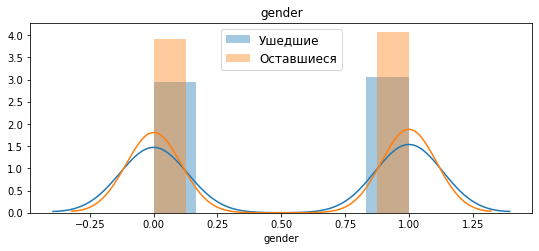

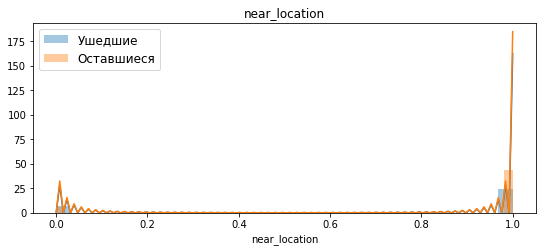

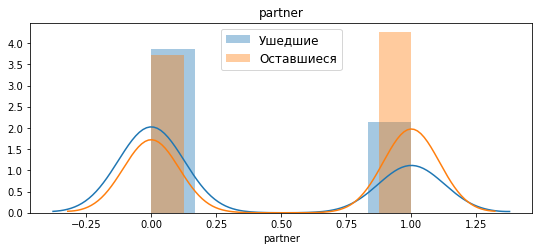

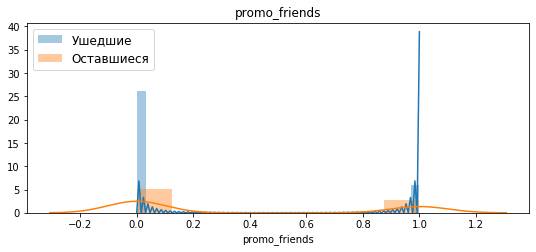

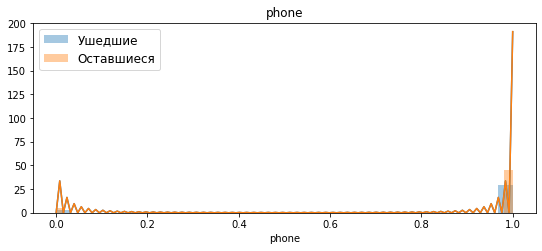

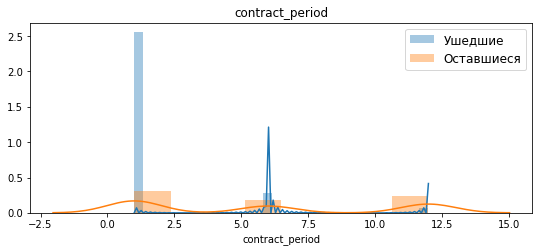

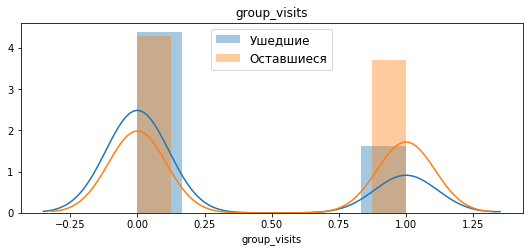

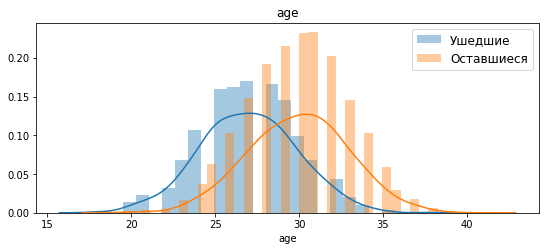

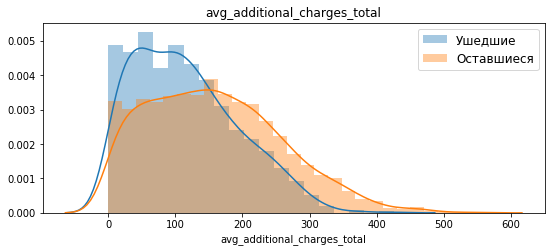

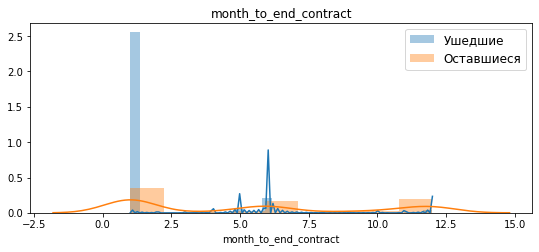

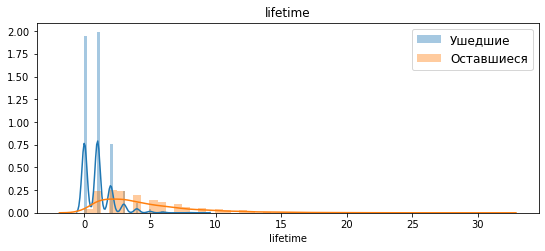

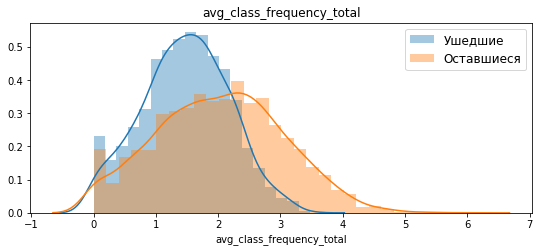

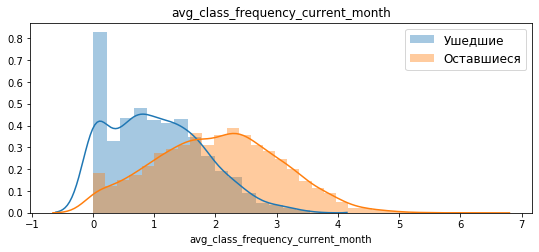

In [30]:
for i in list_columns[0:13]:
    _hist(i)
    

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=sns%20pairplot

### Посмотрим на соотношение признаков. Построим диаграммы методом  `pairplot` <a id="cell0"></a>

### изменим числовые значения столбца `churn` на строковые (иначе выдаст ошибку)<a id="cell10"></a>

In [31]:
df_pairplot = df.copy()
df_pairplot = df_pairplot.replace({'churn':{0:'stay', 1:'go'}})


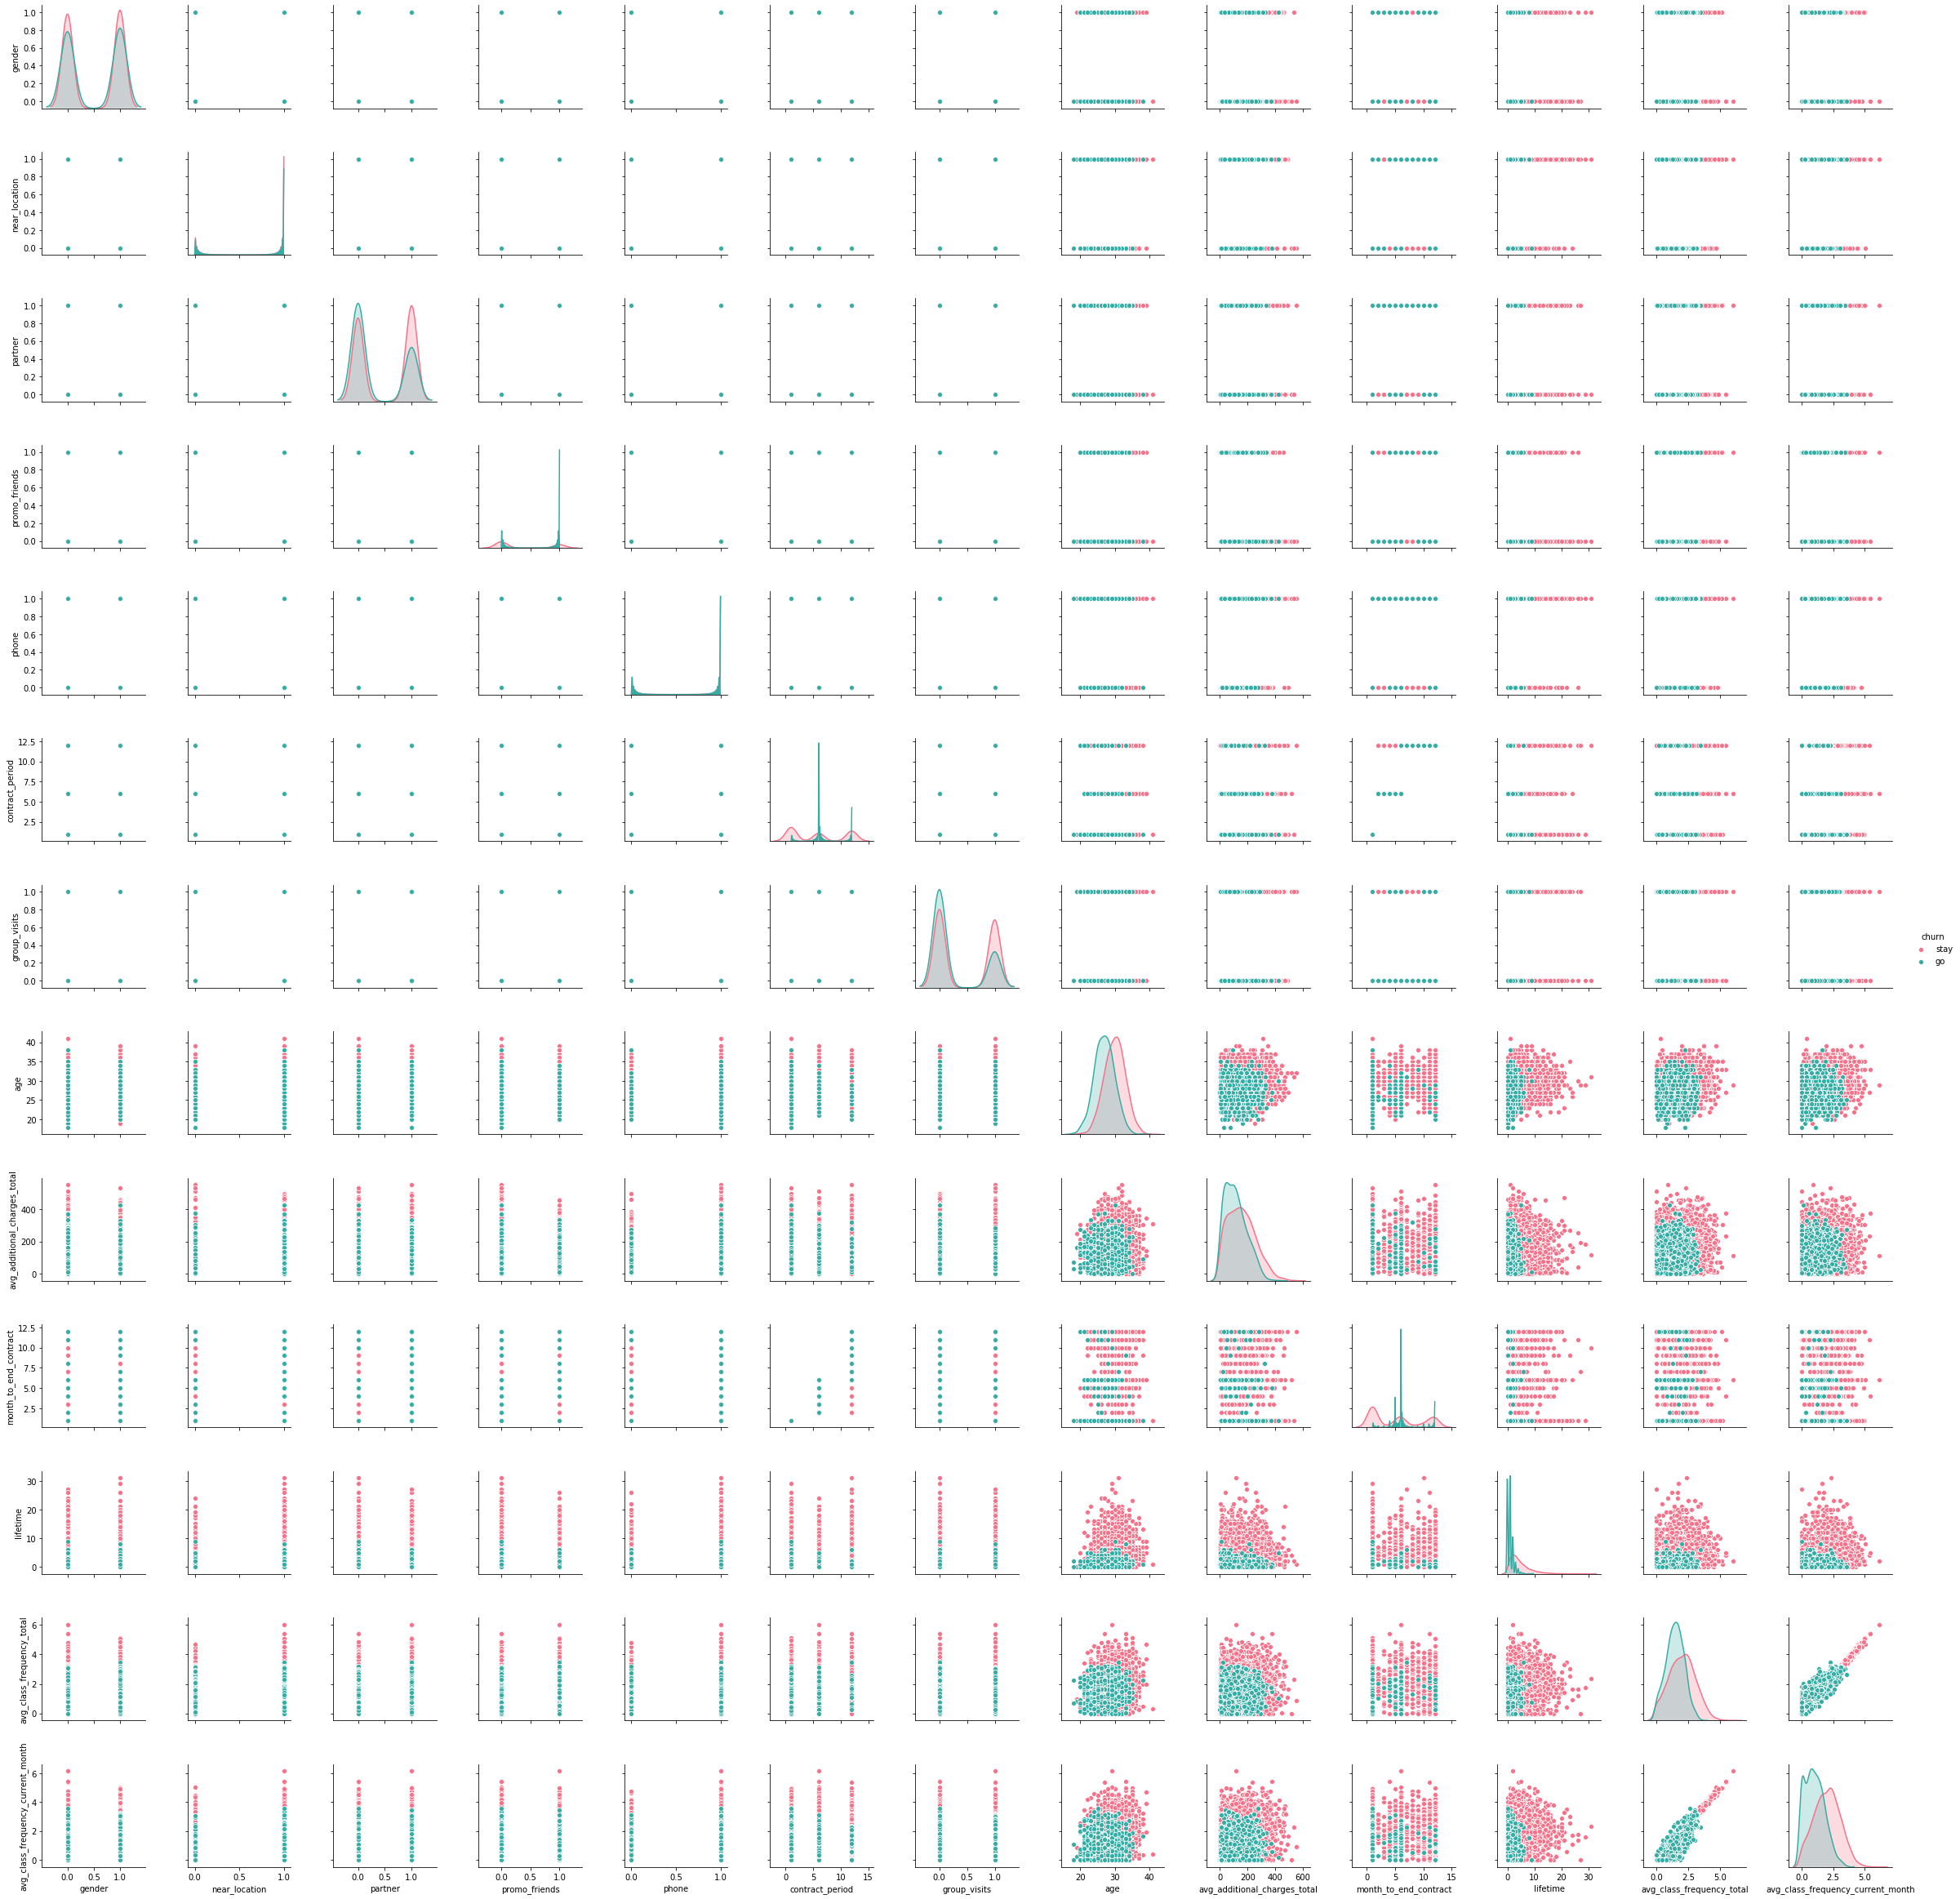

In [32]:
sns.pairplot(df_pairplot, hue='churn', palette="husl");


### Посмотрим на наиболее интресные колонки

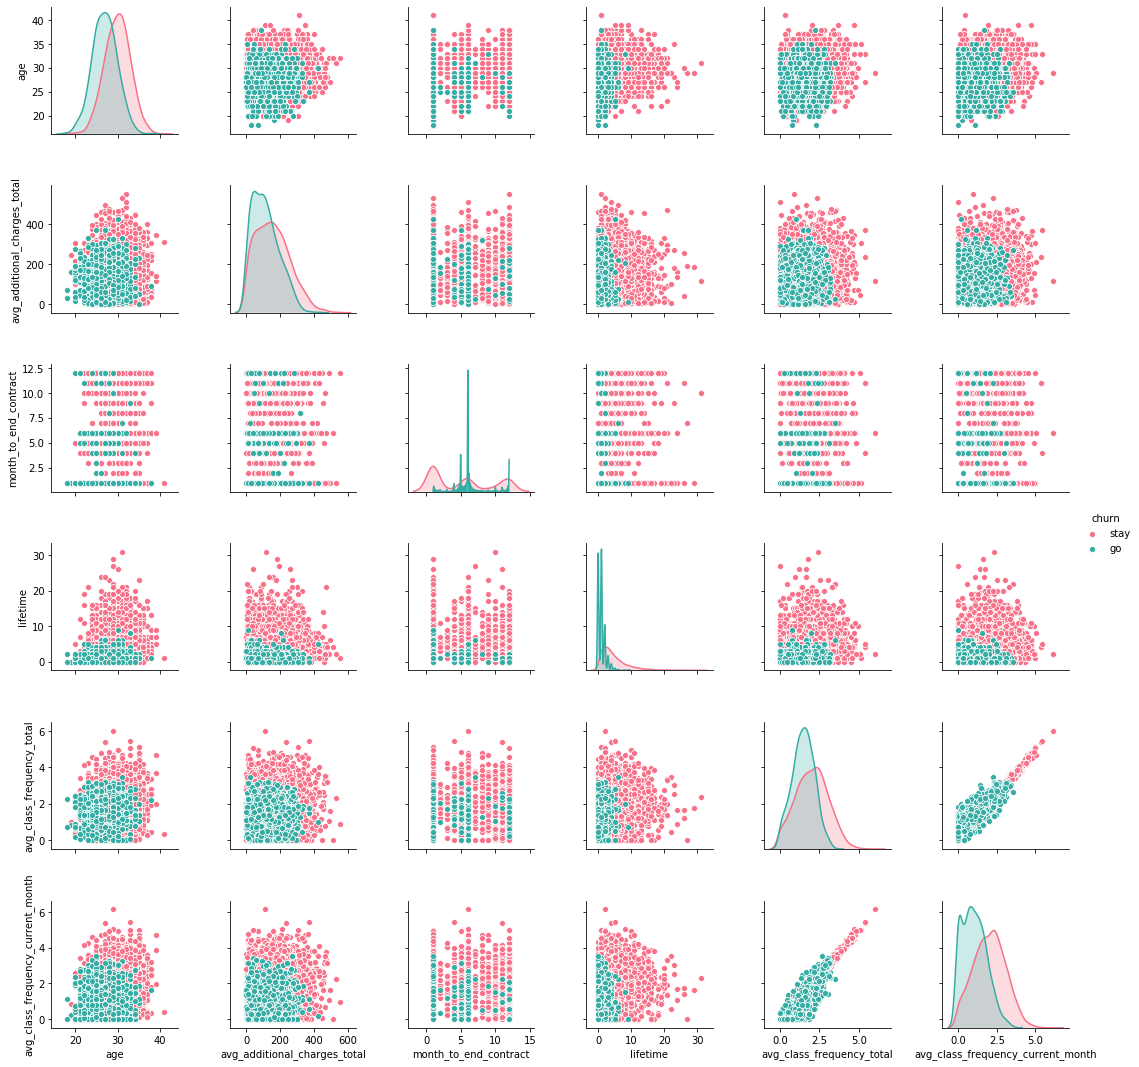

In [33]:
sns.pairplot(df_pairplot[list_columns[7:14]], hue='churn', palette="husl")
plt.show()

### Вывод: Диаграммы и распределение данных  подтверждают наши выводы [здесь](#cell128)

### Построим матрицу корреляций и отобразите её.

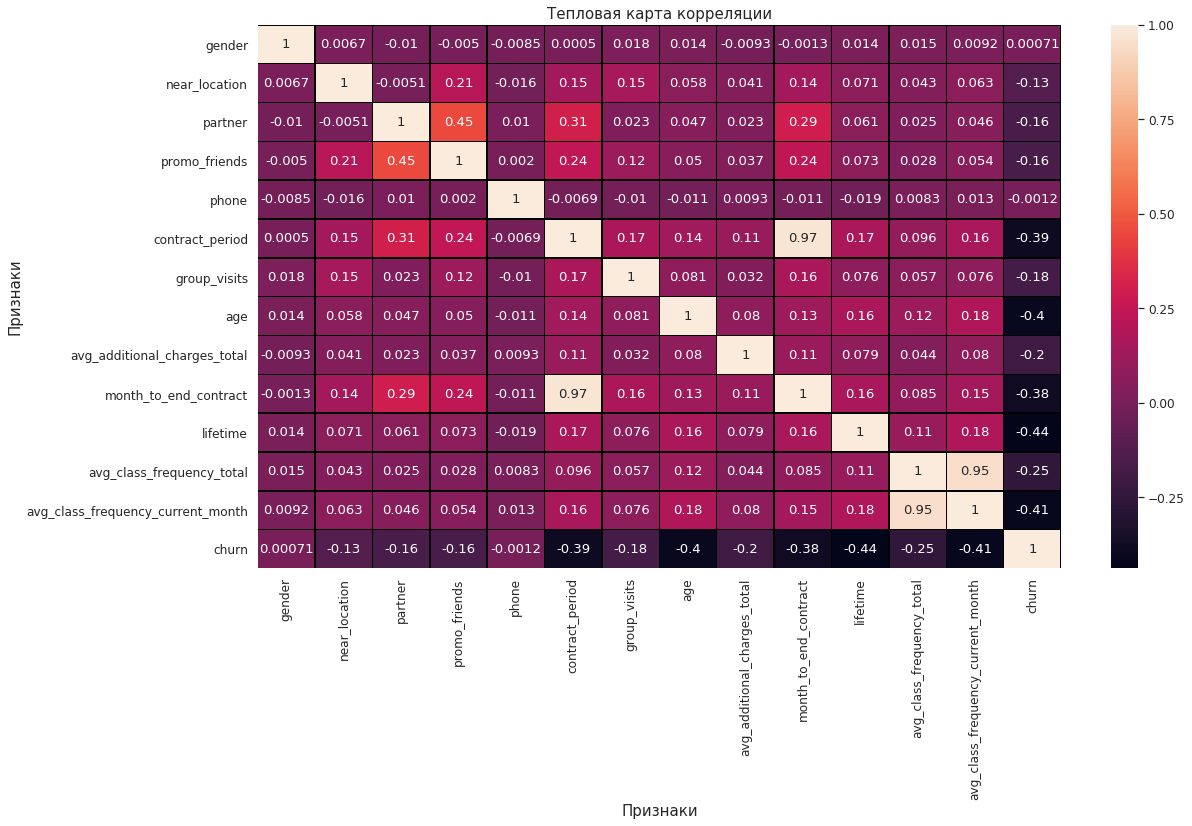

In [34]:
sns.set(font_scale=1.1)
corr_m = df.corr()# напишите ваш код здесь
plt.figure(figsize = (18, 10))
sns.heatmap(corr_m,  annot = True, fmt='.2g', linewidths=.5, linecolor='black')# нарисуем heatmap
plt.title('Тепловая карта корреляции', fontsize = 15) # title with fontsize 20
plt.xlabel('Признаки', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Признаки', fontsize = 15) # y-axis label with fontsize 15
plt.show()

### Вывод: По матрице кореляций
- Клиенты пришедшие по промо коду от друзей и сотрудники компании-партнёра клуба занимаются в зале дольше других
- Видим столбцы полностью коррелирующие друг с другом. Возможно их лучше удалить их чтобы не мешали в обучении моделей

## 2 . Построим модель прогнозирования оттока клиентов
**Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:**

### Разделим наши данные на признаки (матрица X) и целевую переменную (y)

In [36]:
X = df.drop('churn', axis = 1)
y = df['churn']

### Разбьем данные на обучающую и валидационную выборку функцией `train_test_split().`


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Нормализуем данные**

In [38]:
# обучите StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# Преобразуйте обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)



### Обучим модель на train-выборке двумя способами:
**- логистической регрессией,**


In [39]:
# зададим алгоритм для нашей модели
model = LogisticRegression(random_state=0)

# обучим модель
model.fit(X_train_st, y_train)

# воспользуйтесь уже обученной моделью, чтобы сделать прогнозы

predictions_log_reg = model.predict(X_test_st)

""" model.predict_proba(X_test) выдаёт вектор пар значений, где первое значение соответствует вероятности отнесения 
к первому ("0") классу, а второе — ко второму ("1"). Чтобы получить вектор вероятностей отнесения ко второму ("1") классу,
обратитесь по индексу — model.predict_proba(X_test)[:,1] """

probabilities_log_reg = model.predict_proba(X_test_st)[:,1]


**- случайным лесом.**  
https://praktikum.yandex.ru/trainer/data-analyst/lesson/5ab52069-4834-4138-ac64-4798d5f99408/task/42e0a1af-4c75-4fe9-bafa-e066dda0a39e/

In [40]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) # Ваш код здесь
# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st) # Ваш код здесь
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]# Ваш код здесь


### Оценим метрики [accuracy, precision и recall](https://praktikum.yandex.ru/trainer/data-analyst/lesson/7016b289-ea62-4c62-b467-d8504259c553/task/d0c4ee42-61ef-4900-b384-706daf49a9e4/) для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?


- Accuracy: доля правильных ответов 
- Precision: точность (англ. precision)
- Recall: полнота 
- F1_score: баланс между Precision and Recall
- [ROC_AUC](https://praktikum.yandex.ru/trainer/data-analyst/lesson/89dc6f65-f4f4-4f0d-9f0a-451c9b105855/task/3e45c55f-c17f-49cc-8dfd-135ca63c5bd1/): для оценки качества классификатора

**Функция для вывода метрик обучающих моделей**<a id="cell7"></a>

In [41]:
def print_all_metrics(y_true, y_pred, y_proba, title = 'Метрики классификации '):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))


In [42]:
# выведем все метрики
print_all_metrics(y_test, predictions_log_reg, probabilities_log_reg, title = 'Метрики для модели  логистической регрессии')

print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Метрики для модели случайного леса:')

Метрики для модели  логистической регрессии
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
	F1: 0.84
	ROC_AUC: 0.97
Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81
	F1: 0.83
	ROC_AUC: 0.97


**Автоматически при отсечении уверенности по порогу, равному 0.5, predict_proba() выдавал результат, среди которого объекты целевого класса "1" относились к "0".  
Если сместить порог вниз (например, до 0.4) и вручную определить класс на основании такого «кастомного» (англ. custom, «сделанный на заказ, нестандартный») порога, получим более приемлемые результаты.  
Рассчитаем вектор финальных прогнозов с учётом порога, равного 0.4, и сравните с метриками, полученными при автоматическом расчёте классов методом predict().**
https://praktikum.yandex.ru/trainer/data-analyst/lesson/200c3788-034e-4114-89da-2a39ac48ba1b/task/3e4fd5ac-4f39-4e9a-94d5-c578b577dfee/

**Увеличим порого отсечения**

In [43]:
threshold = 0.4

# на основании вероятностей и соотношения классов рассчитайте predict
custom_predictions_log_reg = [0 if i<threshold else 1 for i in probabilities_log_reg]
custom_rf_predictions = [0 if i<threshold else 1 for i in rf_probabilities]

### Удалим сильно коррелирующие столбцы данных, сделаем отдельный дата сет без них для проверки

In [44]:
df_del_corr = df.copy()
df_del_corr = df_del_corr.drop(['month_to_end_contract', 'avg_class_frequency_current_month'], axis=1)


X_dr = df_del_corr.drop('churn', axis = 1)
y_dr = df_del_corr['churn']

X_train_dr, X_test_dr, y_train_dr, y_test_dr = train_test_split(X_dr, y_dr, test_size=0.2, random_state=0)

# обучите StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train_dr)

# Преобразуйте обучающий и валидационные наборы данных
X_train_st_dr = scaler.transform(X_train_dr)
X_test_st_dr = scaler.transform(X_test_dr)
# РЕГРЕССИЯ
model = LogisticRegression(random_state=0)

# обучим модель
model.fit(X_train_st_dr, y_train_dr)

# воспользуйтесь уже обученной моделью, чтобы сделать прогнозы

predictions_log_reg_dr = model.predict(X_test_st_dr)

""" model.predict_proba(X_test) выдаёт вектор пар значений, где первое значение соответствует вероятности отнесения 
к первому ("0") классу, а второе — ко второму ("1"). Чтобы получить вектор вероятностей отнесения ко второму ("1") классу,
обратитесь по индексу — model.predict_proba(X_test)[:,1] """

probabilities_log_reg_dr = model.predict_proba(X_test_st_dr)[:,1]

# СЛУЧАЙНЫЙ ЛЕС

# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model_dr = RandomForestClassifier(n_estimators = 100, random_state = 0) # Ваш код здесь
# обучим модель случайного леса
rf_model_dr.fit(X_train_st_dr, y_train_dr)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions_dr = rf_model_dr.predict(X_test_st_dr) # Ваш код здесь
rf_probabilities_dr = rf_model_dr.predict_proba(X_test_st_dr)[:,1]# Ваш код здесь

# выберем вручную уровень отсечения
threshold = 0.4

# на основании вероятностей и соотношения классов рассчитайте predict
custom_predictions_log_reg_dr = [0 if i<threshold else 1 for i in probabilities_log_reg_dr]
custom_rf_predictions_dr = [0 if i<threshold else 1 for i in rf_probabilities_dr]

# # Посмотрим все вместе

# print_all_metrics(y_test_dr, predictions_log_reg_dr, probabilities_log_reg_dr, title = 'Метрики для модели без корреляции логистической регрессии')

# print_all_metrics(y_test_dr, rf_predictions_dr, rf_probabilities_dr, title = 'Метрики для модели без корреляции случайного леса:')
# # задаем порог

# print_all_metrics(y_test_dr, custom_predictions_log_reg_dr, probabilities_log_reg_dr, title = 'Метрики для модели без корреляции логистической регрессии порог 0.4')

# print_all_metrics(y_test_dr, custom_rf_predictions_dr, rf_probabilities_dr, title = 'Метрики для модели без корреляции случайного леса порог 0.4')

**Посмотрим все вместе**

In [45]:
print_all_metrics(y_test, predictions_log_reg, probabilities_log_reg, title = 'Метрики для модели  логистической регрессии')

print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Метрики для модели случайного леса:')
# задаем порог

print_all_metrics(y_test, custom_predictions_log_reg, probabilities_log_reg, title = 'Метрики для модели логистической регрессии порог 0.4')

print_all_metrics(y_test, custom_rf_predictions, rf_probabilities, title = 'Метрики для модели случайного леса порог 0.4')

# Посмотрим все вместе

print_all_metrics(y_test_dr, predictions_log_reg_dr, probabilities_log_reg_dr, title = 'Метрики для модели без корреляции логистической регрессии')

print_all_metrics(y_test_dr, rf_predictions_dr, rf_probabilities_dr, title = 'Метрики для модели без корреляции случайного леса:')
# задаем порог

print_all_metrics(y_test_dr, custom_predictions_log_reg_dr, probabilities_log_reg_dr, title = 'Метрики для модели без корреляции логистической регрессии порог 0.4')

print_all_metrics(y_test_dr, custom_rf_predictions_dr, rf_probabilities_dr, title = 'Метрики для модели без корреляции случайного леса порог 0.4')

Метрики для модели  логистической регрессии
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
	F1: 0.84
	ROC_AUC: 0.97
Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81
	F1: 0.83
	ROC_AUC: 0.97
Метрики для модели логистической регрессии порог 0.4
	Accuracy: 0.92
	Precision: 0.82
	Recall: 0.86
	F1: 0.84
	ROC_AUC: 0.97
Метрики для модели случайного леса порог 0.4
	Accuracy: 0.92
	Precision: 0.81
	Recall: 0.88
	F1: 0.84
	ROC_AUC: 0.97
Метрики для модели без корреляции логистической регрессии
	Accuracy: 0.90
	Precision: 0.79
	Recall: 0.81
	F1: 0.80
	ROC_AUC: 0.95
Метрики для модели без корреляции случайного леса:
	Accuracy: 0.89
	Precision: 0.79
	Recall: 0.76
	F1: 0.77
	ROC_AUC: 0.94
Метрики для модели без корреляции логистической регрессии порог 0.4
	Accuracy: 0.89
	Precision: 0.74
	Recall: 0.83
	F1: 0.78
	ROC_AUC: 0.95
Метрики для модели без корреляции случайного леса порог 0.4
	Accuracy: 0.89
	Precision: 0.74
	Recall: 0.83
	F1: 0.78
	ROC_AUC: 0.94


### Вывод: 
- Все модели, кроме моделей обученных на дата сете без колонок, с корреляцией показывают одинаковую и довольно неплохую долю правильных ответов, рассмотрим ниже только их.
- у моделей обученных методом регрессии немного больше показатель точности
- у моделей обученных методом случайного дерева немного больше показатель полноты
- оценка качества классификатора везде одинакова
- мы видим что наиболее высокие показатель Recall у нас имеет модель обученая на моделе случайного дерева, с порогом срабатывания 0.4 Также она имеет немного лучший баланс между Precision и Recall
#### Думаю что она является для нас лучшим выбором

## 3. Сделаем кластеризацию клиентов


**Стандартизируем данные.**

In [62]:
scaler = StandardScaler() # создаём объект класса scaler (нормализатор)
df_drop_sc = scaler.fit_transform(df.drop(columns = ['churn'])) 

### Построим матрицу расстояний на стандартизованной матрице признаков и нарисуем дендрограмму и оценим предложенное алгоритмом количество кластеров


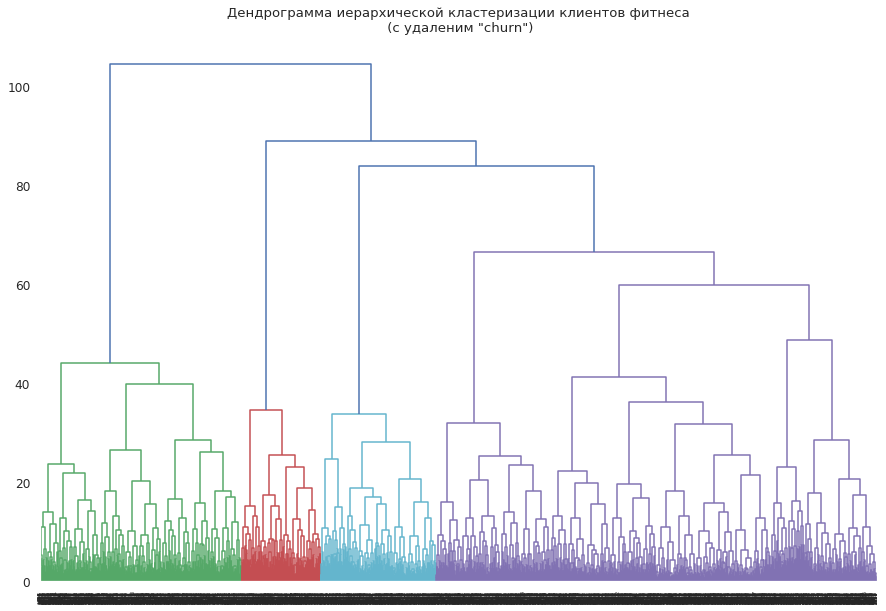

In [47]:
linked = linkage(df_drop_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Дендрограмма иерархической кластеризации клиентов фитнеса\n (с удаленим "churn")')
plt.show()

## Вывод: алгоритм предложил оптимальное число кластеров 4 — четыре разных цвета на графике.

### Четвертый столбец очень большой попробуем добавить столбец 'churn' и посмотрим на результат

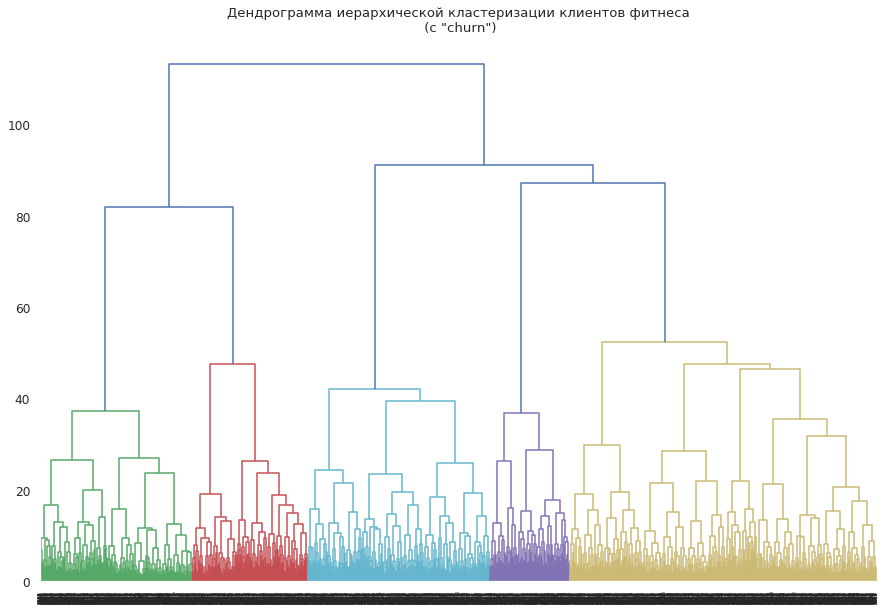

In [48]:
scaler = StandardScaler() # создаём объект класса scaler (нормализатор)
df_sc = scaler.fit_transform(df) 
linked = linkage(df_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Дендрограмма иерархической кластеризации клиентов фитнеса\n (с "churn")')
plt.show()
plt.show() 

## Вывод: число кластеров с дополнительным столбцом увеличилось до 5 что судя по дендрограмме более реально

### Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. за число кластеров примем `n=5`

In [49]:
km = KMeans(n_clusters = 5)
labels = km.fit_predict(df_drop_sc)
df['cluster_km'] = labels
display(df.head())

gender  near_location  partner  promo_friends  phone  contract_period  group_visits  age  avg_additional_charges_total  month_to_end_contract  lifetime  avg_class_frequency_total  avg_class_frequency_current_month  churn  cluster_km
0  1       1              1        1              0      6                1             29   14.227470                     5.0                    3         0.020398                   0.000000                           0      0         
1  0       1              0        0              1      12               1             31   113.202938                    12.0                   7         1.922936                   1.910244                           0      4         
2  0       1              1        0              1      1                0             28   129.448479                    1.0                    2         1.859098                   1.736502                           0      1         
3  0       1              1        1              1      12               1             33   62.669863                     12.0                   2         3.205633                   3.357215                           0      4         
4  1       1              1        1              1      1                0             26   198.362265                    1.0                    3         1.113884                   1.120078                           0      2

### Проверим  метрикой силуэта качество кластеризации
**Значение метрики силуэта принимает значения от -1 до 1. Чем ближе к 1, тем качественнее кластеризация.**

In [50]:
print('Silhouette_score: {:.2f}'.format(silhouette_score(df_drop_sc, labels) ))
print('Silhouette_score with churh: {:.2f}'.format(silhouette_score(df_sc, labels) ))


Silhouette_score: 0.13
Silhouette_score with churh: 0.13


### Вывод: качество кластеризации не очень высокое

### Посмотрим на средние значения признаков для кластеров.  Развернем таблицу для удобства<a id="cell6"></a>


In [51]:
df_mean_avg = df.groupby('cluster_km').mean()
# развернем таблицу
df_mean_avg = df_mean_avg.transpose()
df_mean_avg.columns = ['cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4']
# а можно и так
# df.groupby('cluster_km').mean().T
display(df_mean_avg)

cluster_0   cluster_1   cluster_2   cluster_3   cluster_4
gender                             0.523316    0.480800    0.496805    0.566514    0.500000  
near_location                      0.862694    0.723200    0.948882    0.847477    0.936490  
partner                            0.471503    0.295200    0.819489    0.277523    0.740185  
promo_friends                      0.305699    0.013600    0.998403    0.066514    0.480370  
phone                              0.000000    1.000000    1.000000    1.000000    1.000000  
contract_period                    4.777202    1.913600    3.039936    2.674312    11.840647 
group_visits                       0.427461    0.276000    0.440895    0.446101    0.547344  
age                                29.297927   28.112800   29.097444   30.035550   29.885681 
avg_additional_charges_total       144.208179  129.729916  141.273179  160.620045  163.337725
month_to_end_contract              4.466321    1.820000    2.845048    2.478211    10.796767 
lifetime                           3.940415    2.208000    3.731629    4.817661    4.712471  
avg_class_frequency_total          1.854211    1.246720    1.725697    2.786588    1.999725  
avg_class_frequency_current_month  1.723967    0.992866    1.618826    2.778924    1.991994  
churn                              0.266839    0.564000    0.257188    0.083716    0.021940

### Для каждого полученного кластера посчитаем долю оттока. 

In [52]:
for clast in range(0, 5):
    df_int = df.loc[df['cluster_km'] == clast, ['churn']]
    df_int_avg = round(df_int.loc[df_int['churn'] == 1].shape[0]/df_int.shape[0]*100, 2)
    print('Доля оттока посетителей в кластере', clast, '-', df_int_avg, '%')

Доля оттока посетителей в кластере 0 - 26.68 %
Доля оттока посетителей в кластере 1 - 56.4 %
Доля оттока посетителей в кластере 2 - 25.72 %
Доля оттока посетителей в кластере 3 - 8.37 %
Доля оттока посетителей в кластере 4 - 2.19 %


### Посчитаем долю каждого кластера в общем обьеме

In [53]:
for clast_part in range(0, 5):
    df_int_part = round(df[df['cluster_km'] == clast_part].shape[0]/df.shape[0]*100, 2)
    print('Доля  кластера', clast_part, '-', df_int_part, '%')

Доля  кластера 0 - 9.65 %
Доля  кластера 1 - 31.25 %
Доля  кластера 2 - 15.65 %
Доля  кластера 3 - 21.8 %
Доля  кластера 4 - 21.65 %


### Выводы: 
**- наибольший отток посетителей в кластерах 2, 4 и 0 суммарно эти кластеры занимают 56% от общего обьема а это немало**
   - во втором кластере доля оттока более 56% и он занимает более 31% от общего обьема
    > - здесь самая маленькая длительность текущего действующего абонемента среди всех кластеров
    > - самая маленькая посещаемость групповых занятий
    > - здесь занимаются самые молодые клиенты
    > - здесь самая маленькая суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон
    > - здесь наименьщее количество посетителей живущих рядом
    > - здесь наименьщее количество посещений в неделю и за прощлый месяц
   - интересная особенность кластера 4, второго по оттоку посетителей
    > - отсутствие телефонов клиентов 

**- наиболее надежные кластеры 1 и 3**
   - самый успешный кластер 3
   > - наибольшее количество клиентов живущих рядом
   > - второй по величине показатель количества клиентов из копании партнера
   > - второй по величине показатель количества клиентов приходящих по промо коду друзей
   > - максимальная длительность текущего действующего абонемента
   > - максимальная величина посещаемости групповых занятий
   > - самая большая суммарная выручка от доп. услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон
   > - возрастные клиенты 2 место
   > - здесь второе по величине количество посещений в неделю и за прощлый месяц
   -  кластер 1
   > - второе по величине количество посещаемости групповых занятий
   > - наиболее возрастные клиенты 
   > - вторая по величине суммарная выручка от доп. услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон
   > - вторая по величине длительность текущего действующего абонемента
   > - здесь максимальное количество посещений в неделю и за прощлый месяц

### Построим распределения признаков для кластеров.  <a id="cell12"></a>


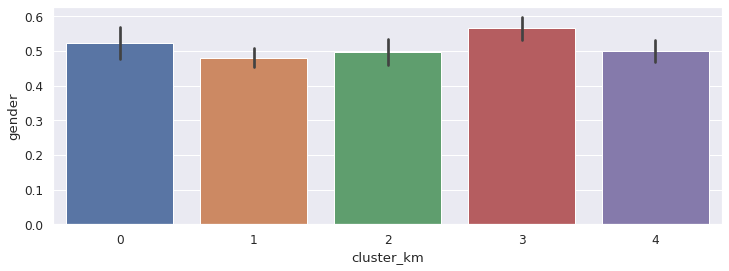

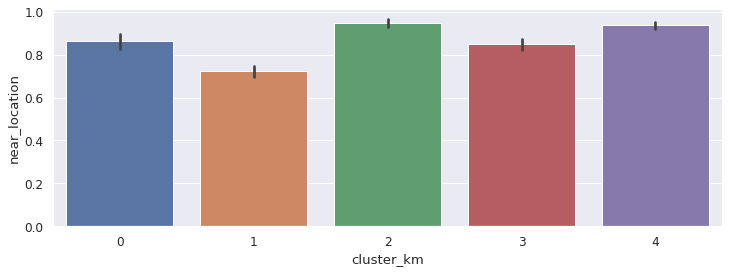

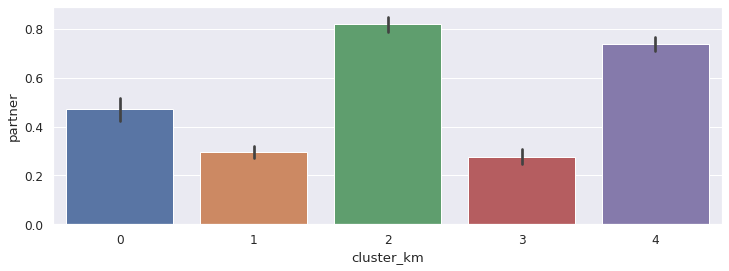

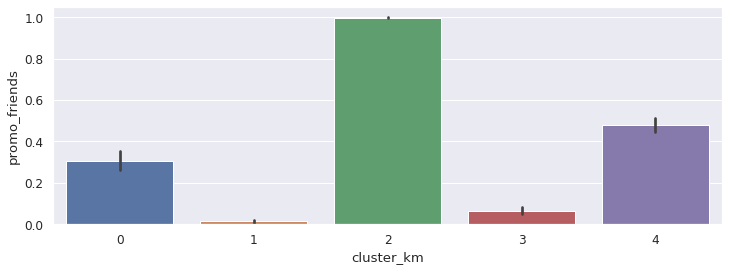

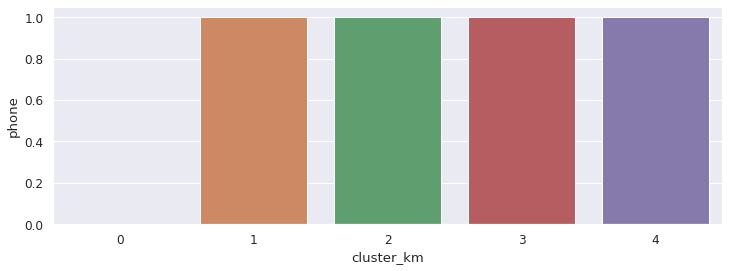

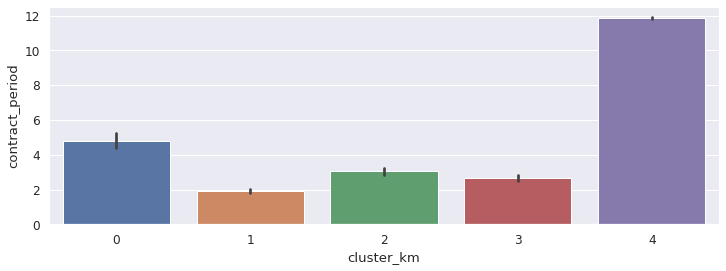

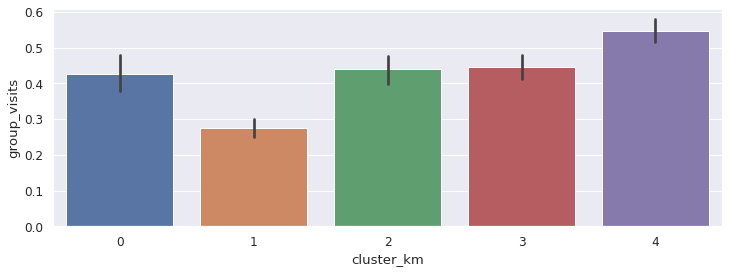

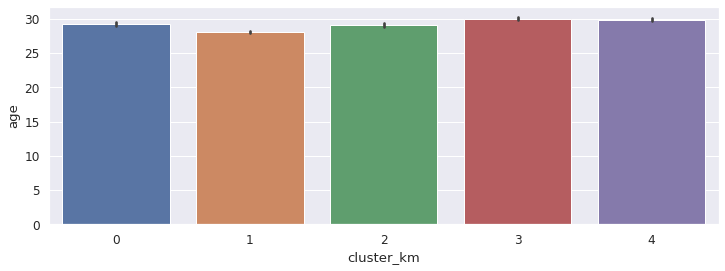

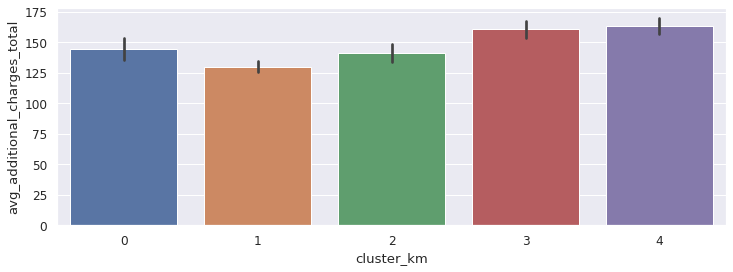

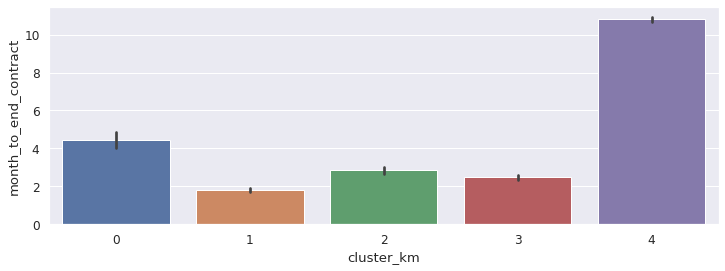

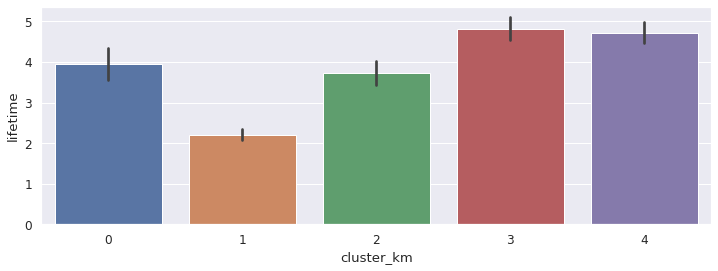

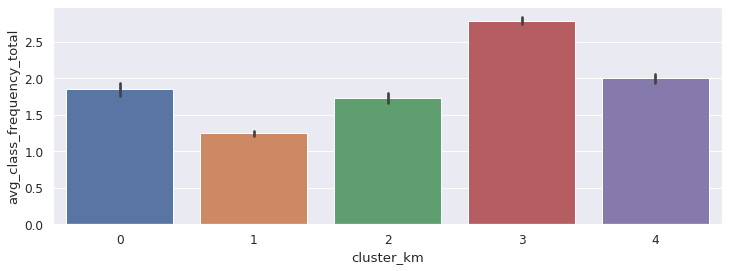

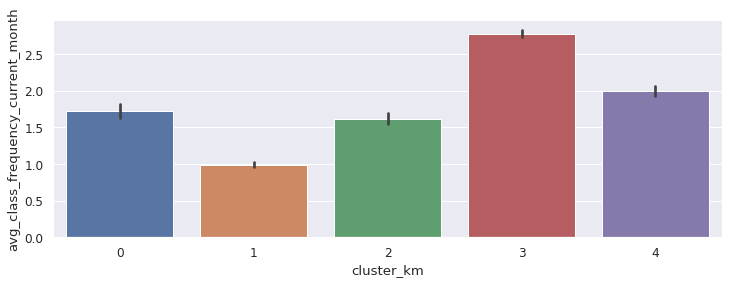

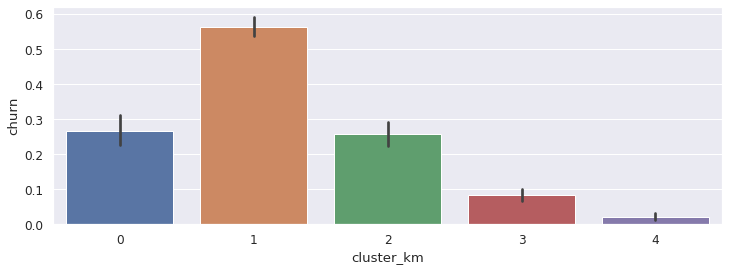

In [54]:
for col in list_columns:
    plt.figure(figsize=(12, 4))  
    sns.barplot(data=df, y=col, x='cluster_km');

###  Определим функцию отрисовки графиков попарных признаков для кластеров <a id="cell11"></a>

In [55]:
display(list_columns)

['gender',
 'near_location',
 'partner',
 'promo_friends',
 'phone',
 'contract_period',
 'group_visits',
 'age',
 'avg_additional_charges_total',
 'month_to_end_contract',
 'lifetime',
 'avg_class_frequency_total',
 'avg_class_frequency_current_month',
 'churn']

In [56]:
def show_clusters_on_plot(df, x_name,y_name, cluster_name):
    plt.figure(figsize = (8,8))
    sns.scatterplot(df[x_name], df[y_name],
           hue = df[cluster_name], palette =['green','orange','brown','dodgerblue','red'], size=df[cluster_name],
    sizes=(20, 200), hue_norm=(0, 7), legend="full")
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

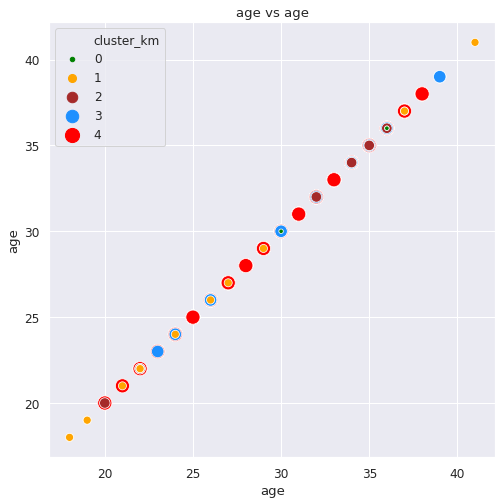

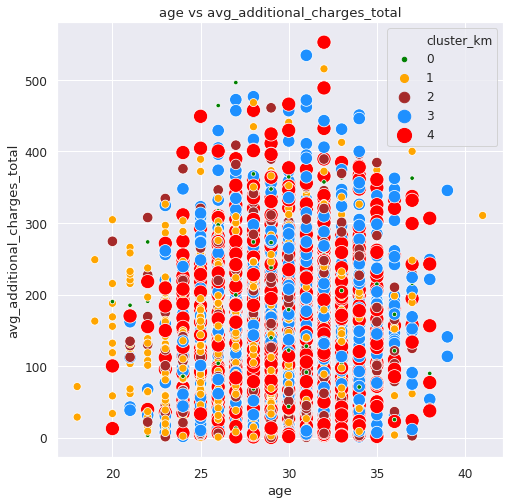

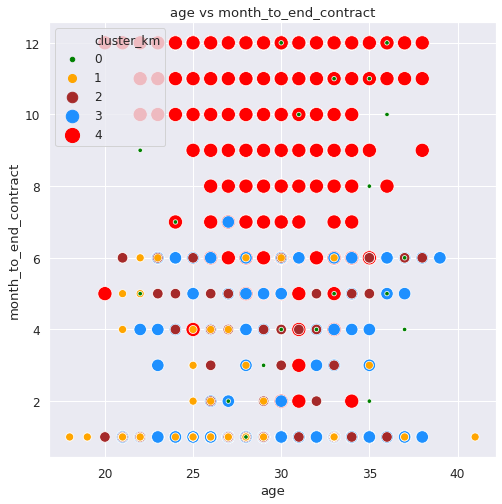

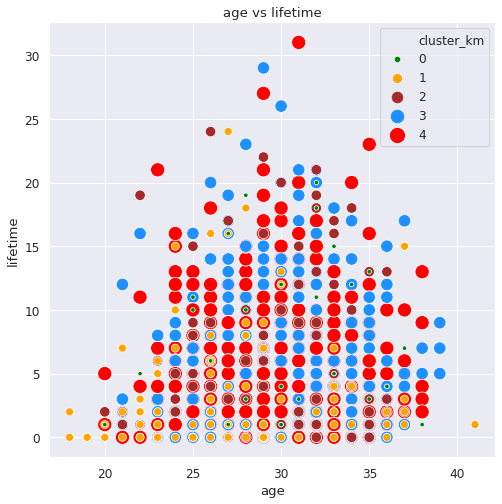

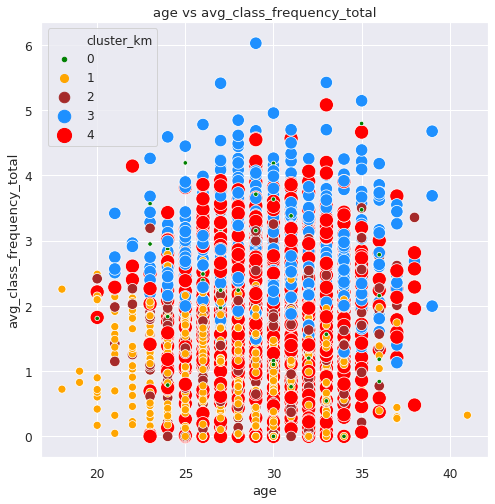

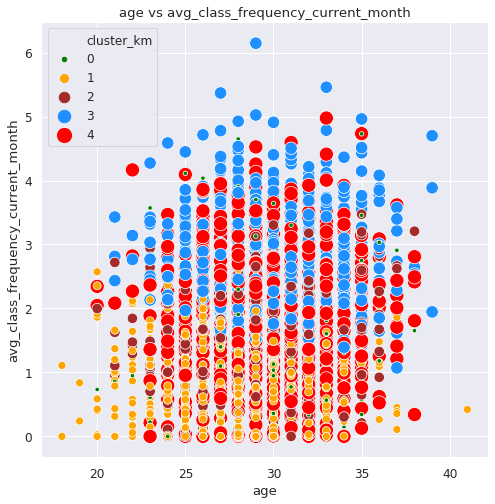

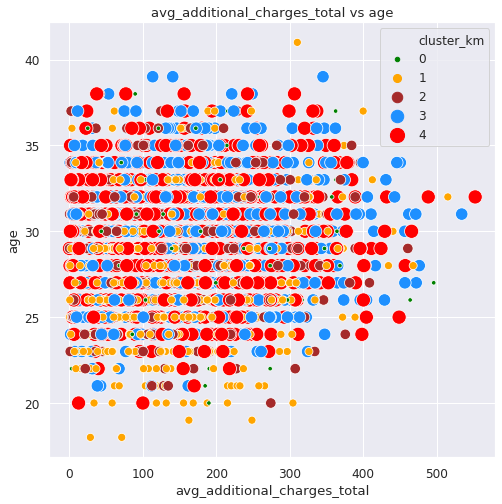

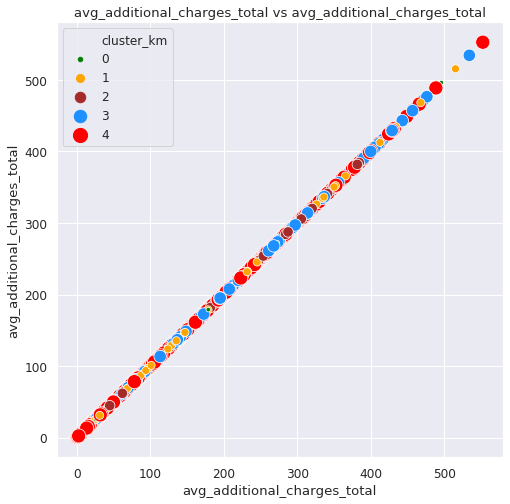

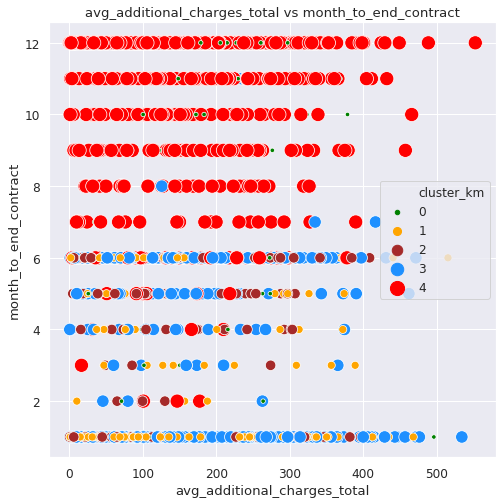

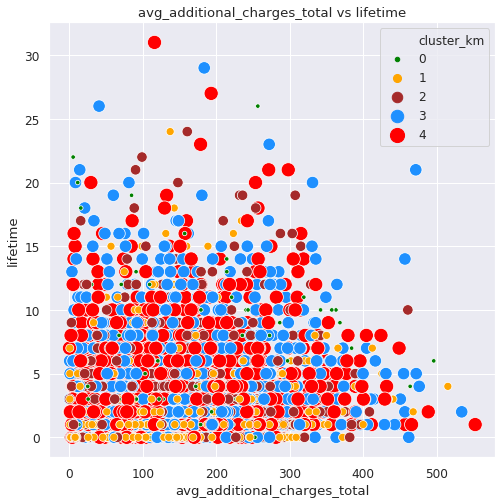

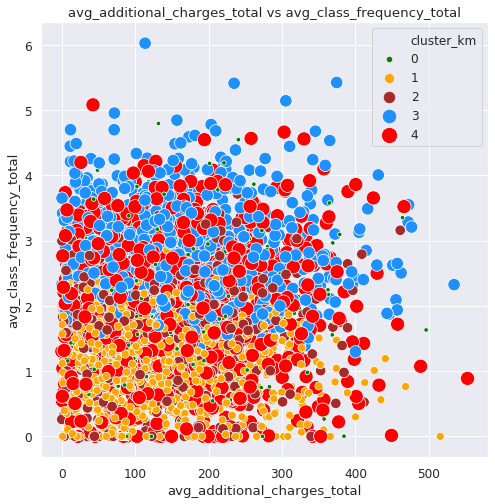

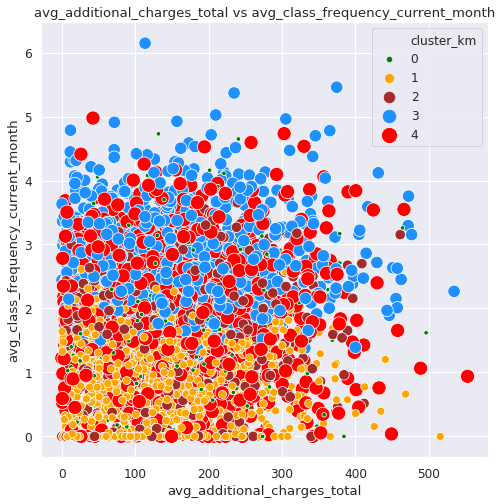

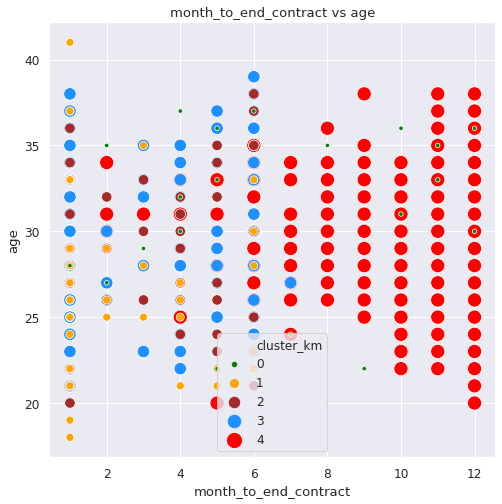

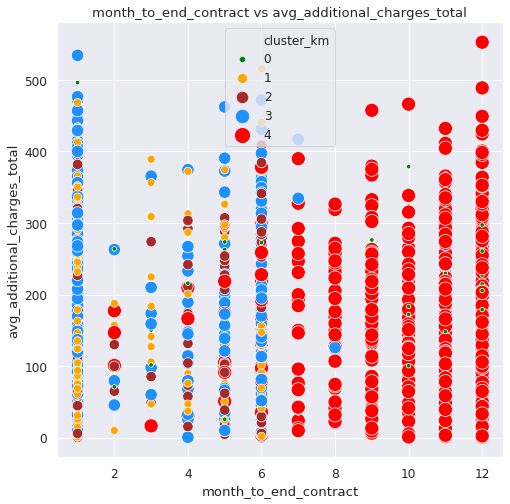

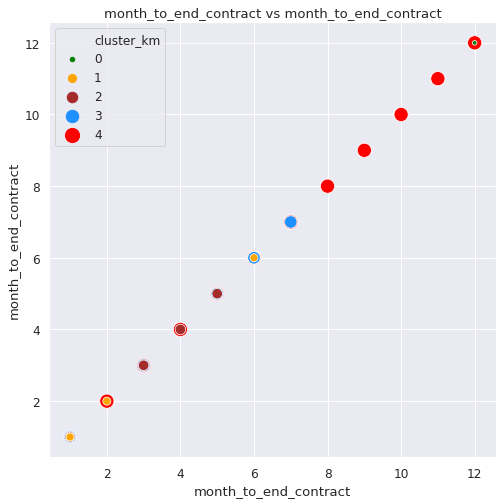

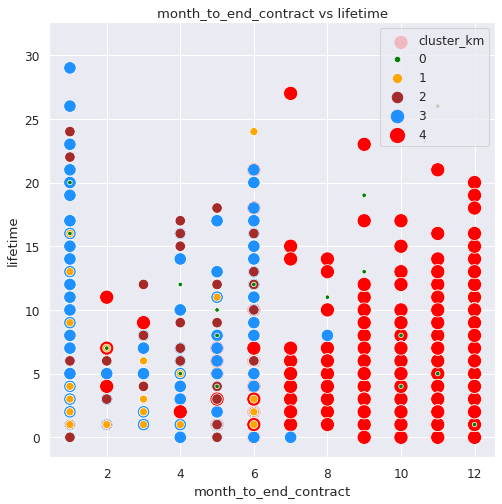

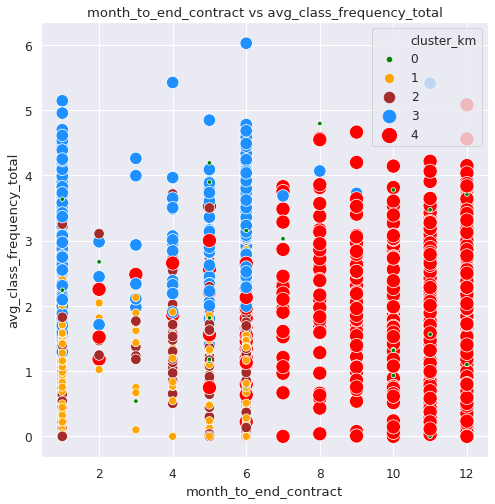

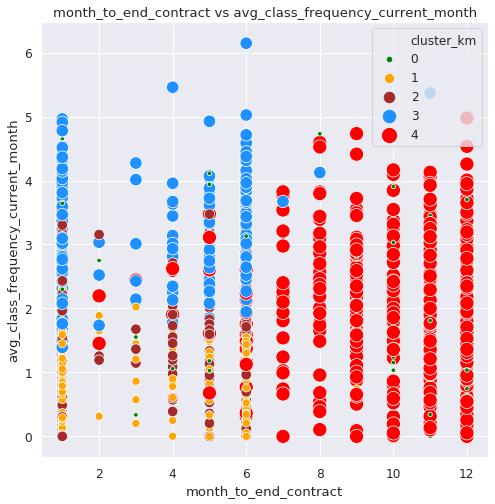

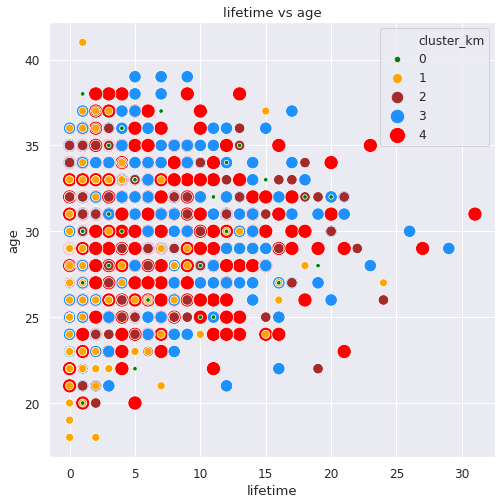

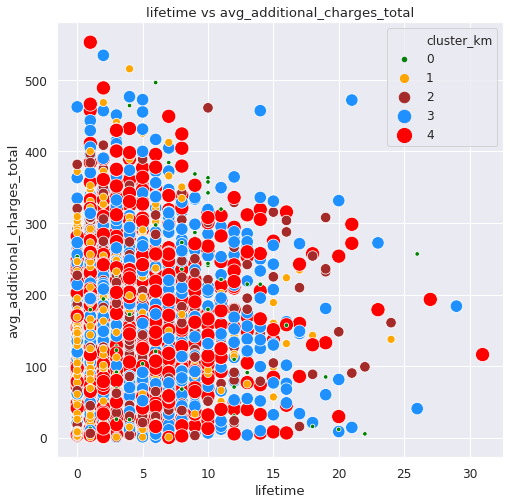

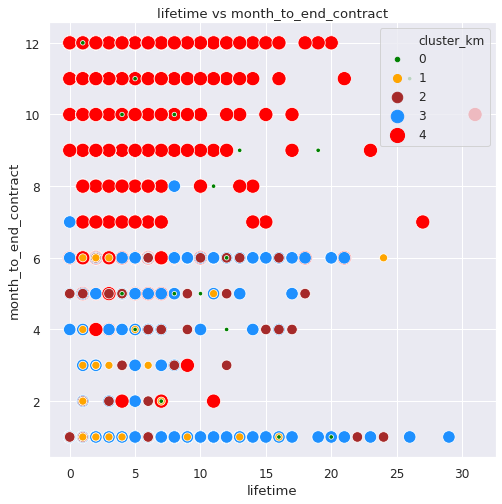

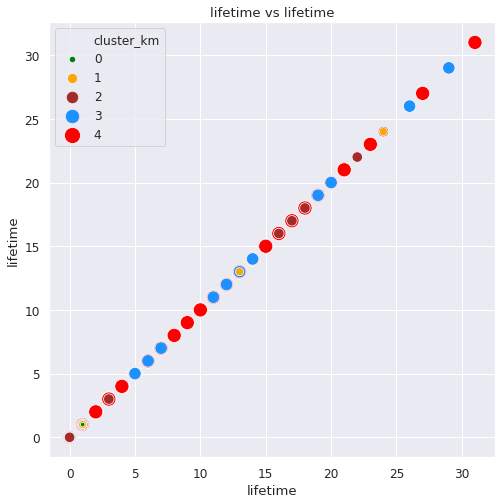

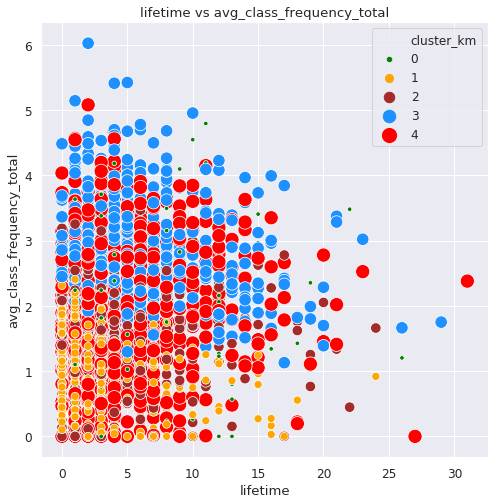

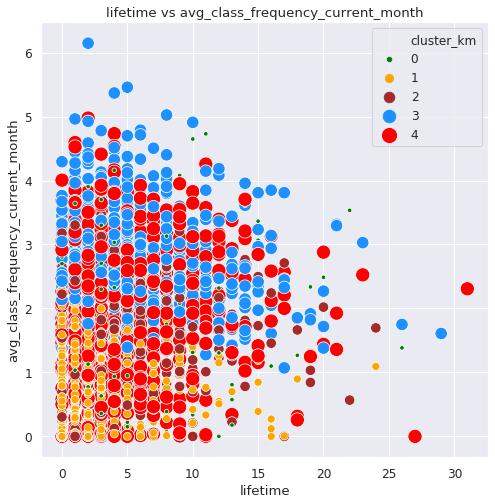

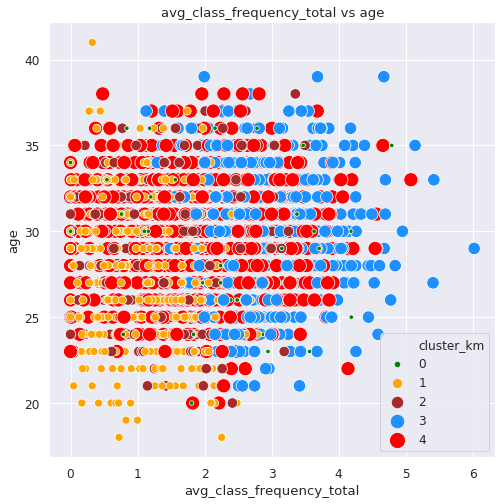

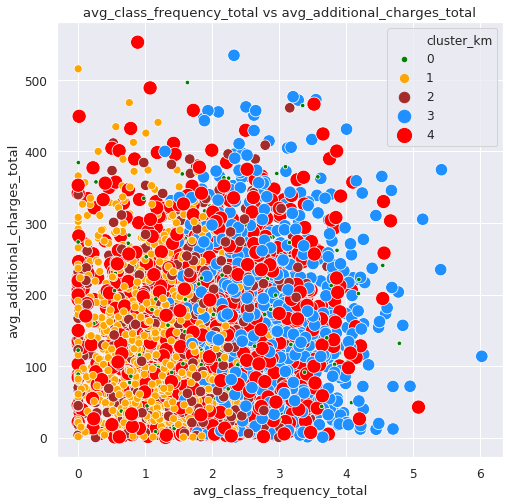

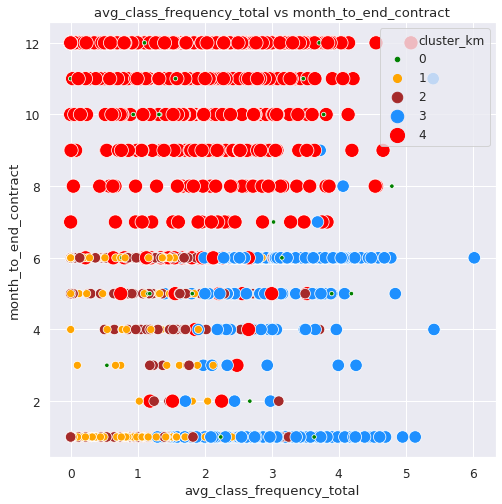

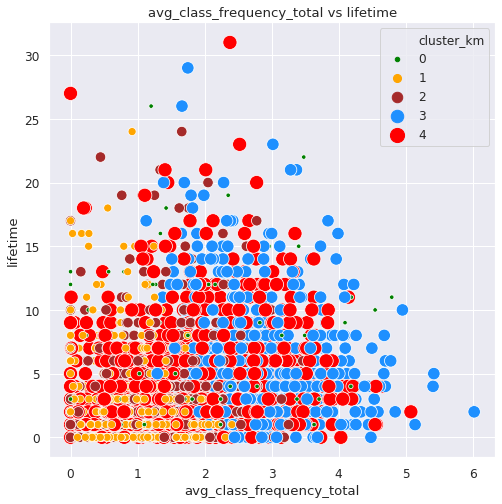

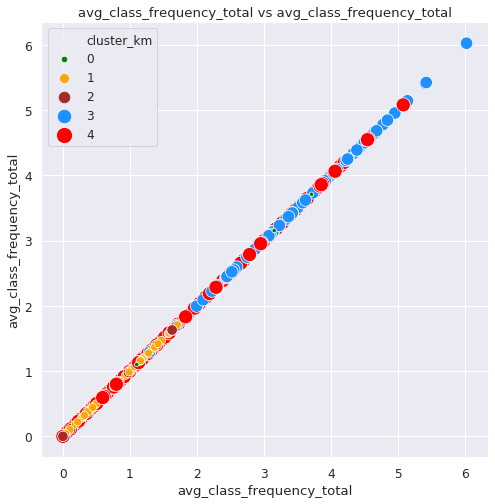

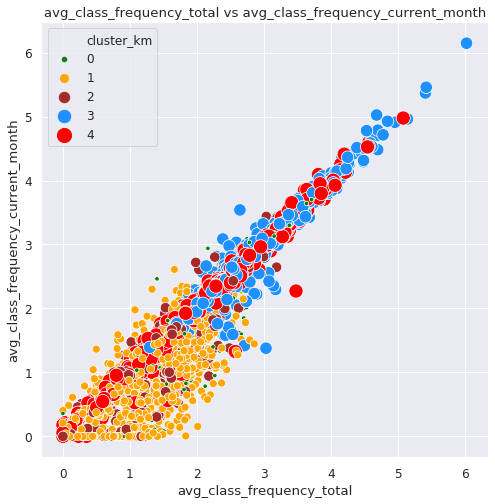

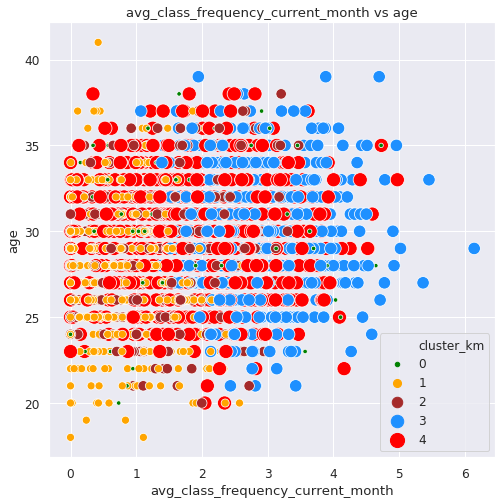

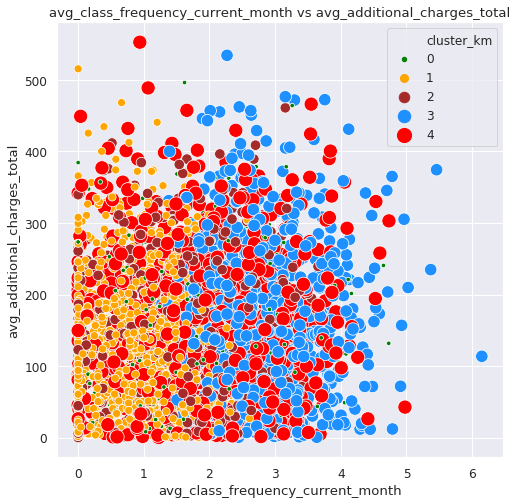

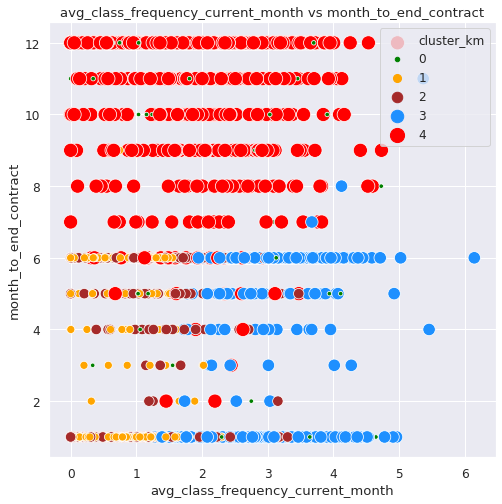

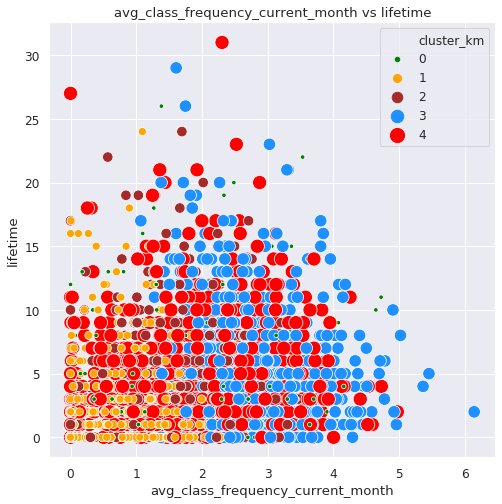

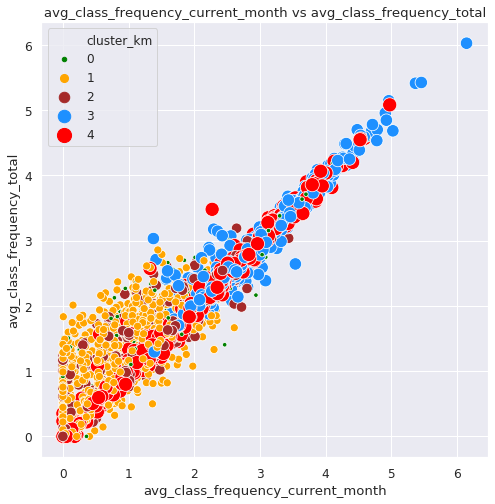

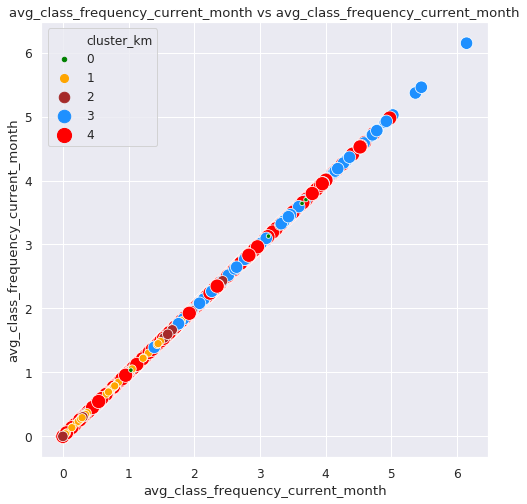

In [57]:
list_columns_scatt = ['age',
 'avg_additional_charges_total',
 'month_to_end_contract',
 'lifetime',
 'avg_class_frequency_total',
 'avg_class_frequency_current_month']

for x_name in list_columns_scatt:
    for y_name in list_columns_scatt:
        show_clusters_on_plot(df, x_name, y_name, 'cluster_km')

https://praktikum.yandex.ru/trainer/data-analyst/lesson/a4e1d69f-75d4-451f-8272-61d4828b1155/task/39d464b4-0c23-41f7-ac84-5d66bdca55b6/

https://praktikum.yandex.ru/trainer/data-analyst/lesson/fc0cc613-2795-429a-aaf4-84761c1ea1ca/task/78104f5f-2110-45b7-a9c3-2f749b6491d6/

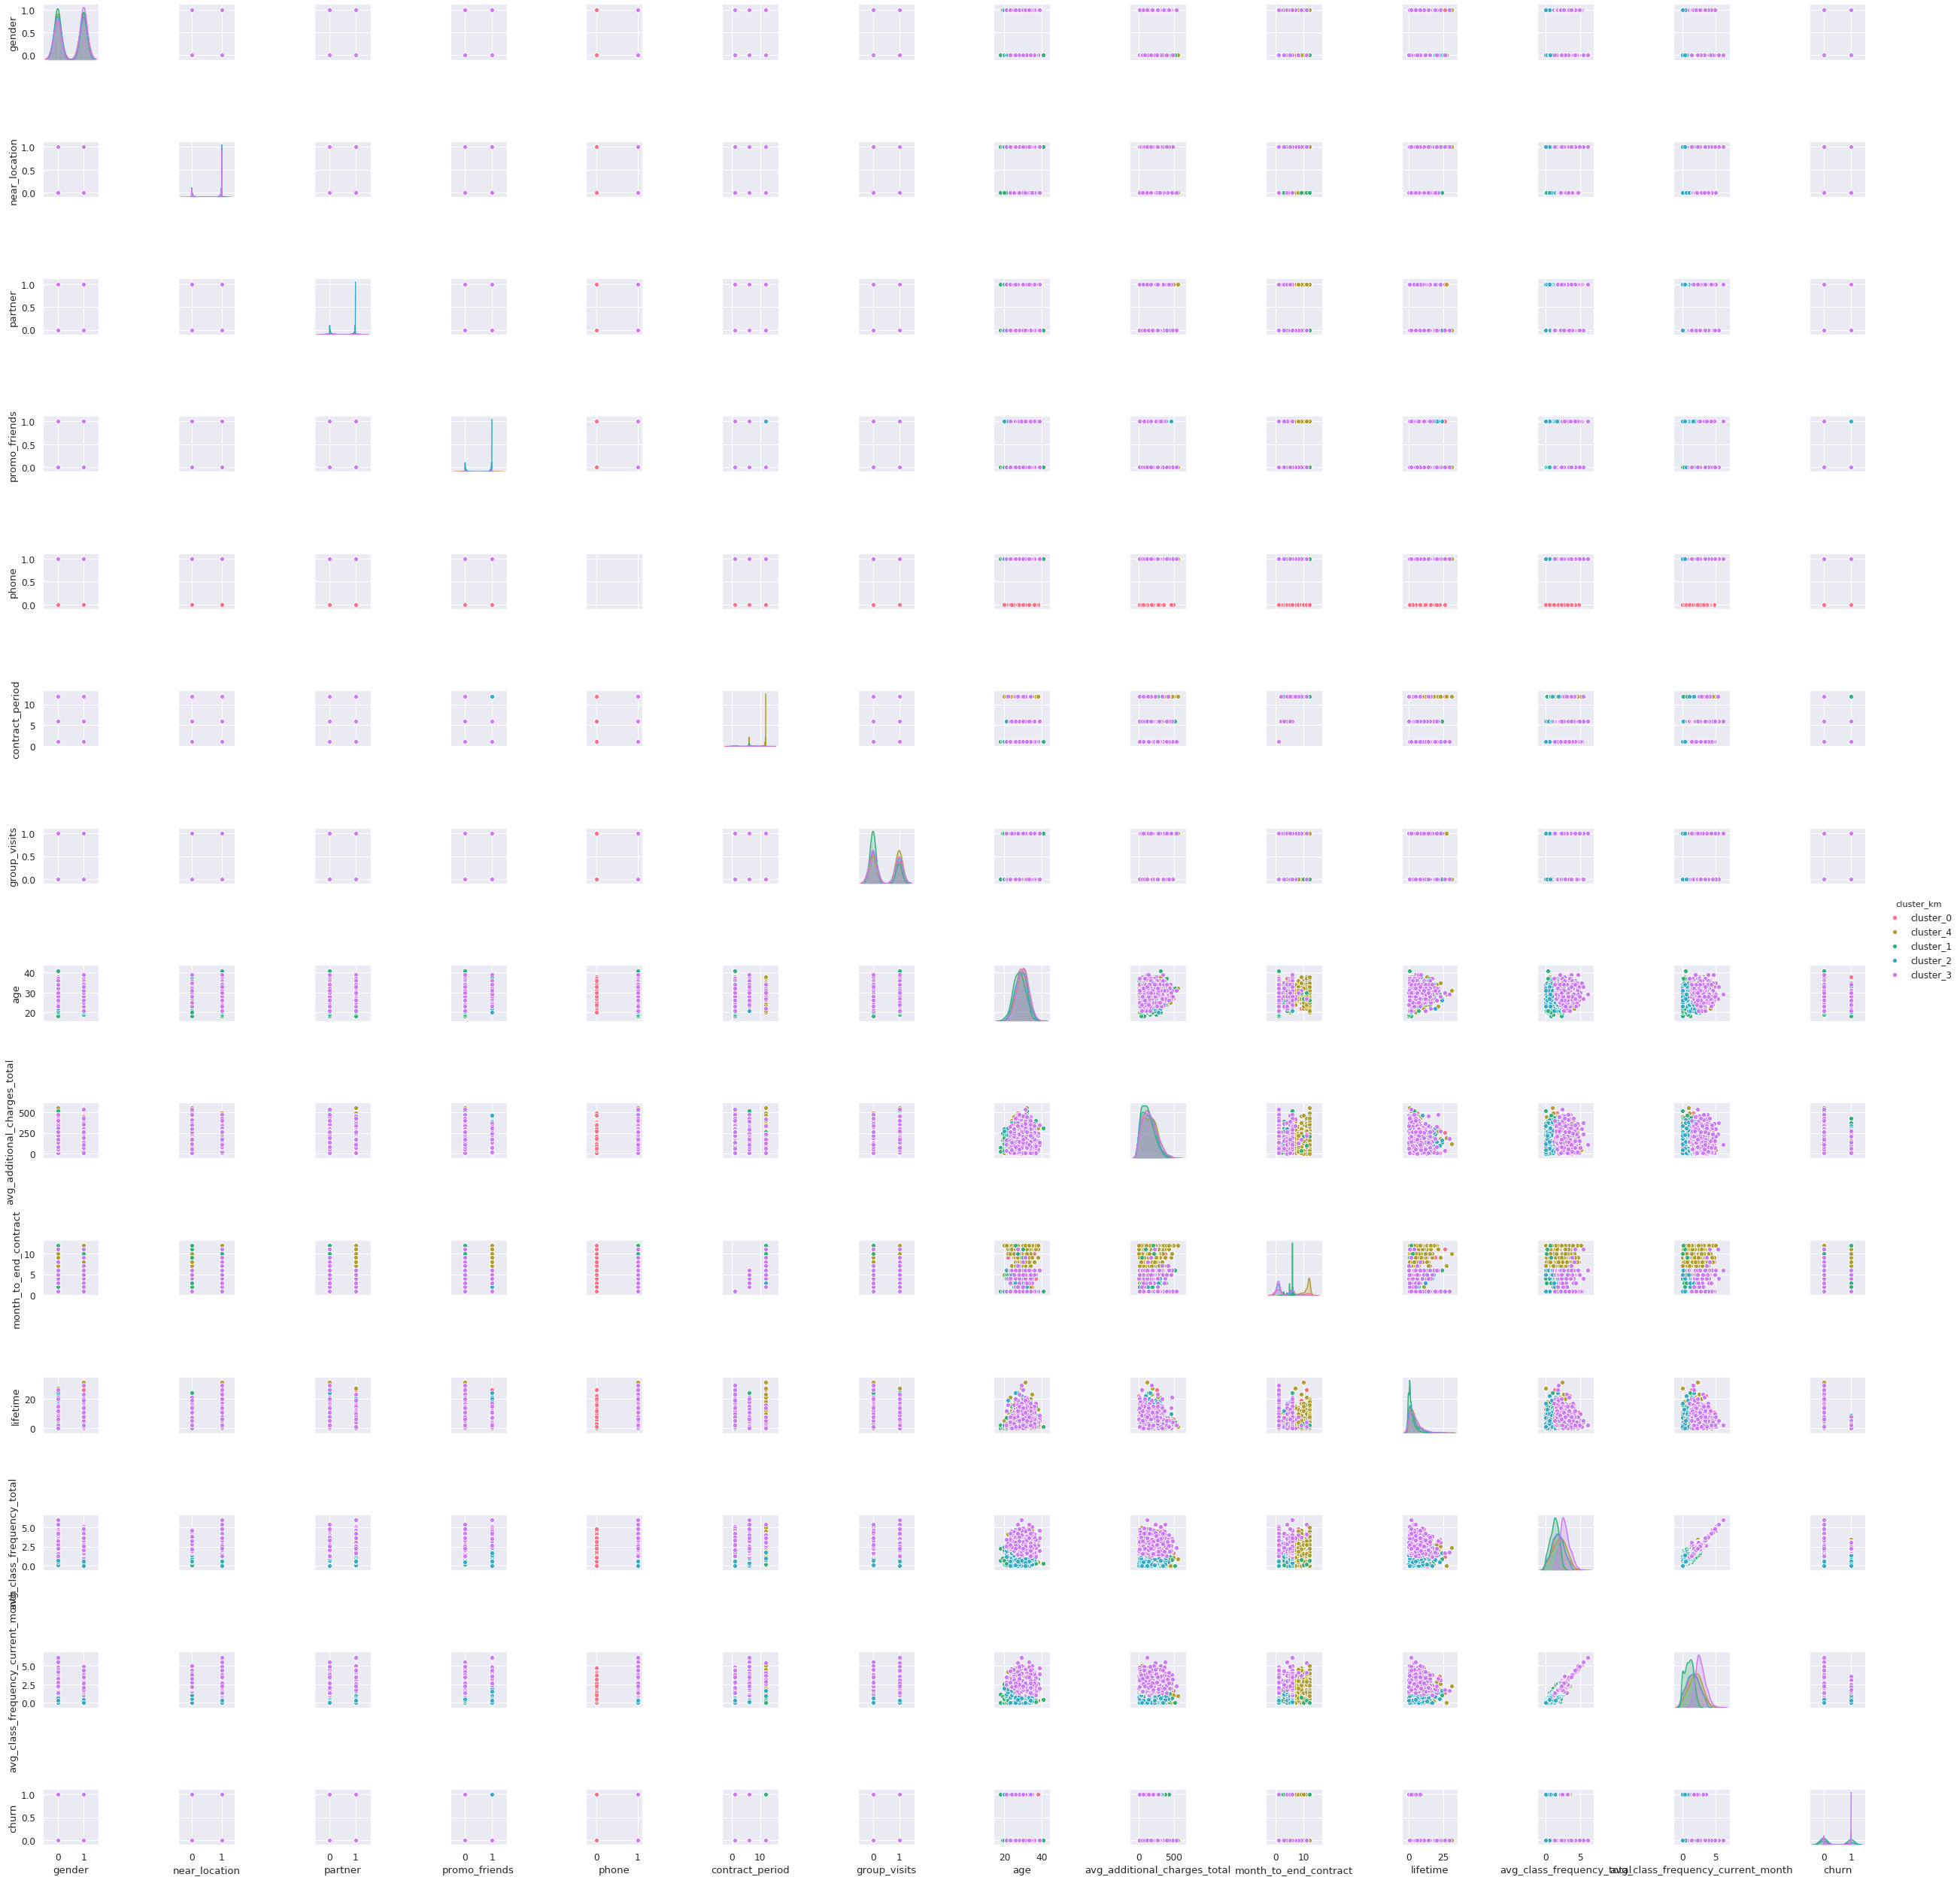

In [58]:
claster_df = df.copy()
#claster_df = claster_df.drop(columns = ['churn'])
claster_df = claster_df.replace({'cluster_km':{0:'cluster_0', 1:'cluster_1', 2:'cluster_2', 3:'cluster_3', 4:'cluster_4'}})

sns.pairplot(claster_df,  hue='cluster_km', palette="husl");


In [59]:
list_columns_cluster = claster_df.columns.tolist()
display(list_columns_cluster)

['gender',
 'near_location',
 'partner',
 'promo_friends',
 'phone',
 'contract_period',
 'group_visits',
 'age',
 'avg_additional_charges_total',
 'month_to_end_contract',
 'lifetime',
 'avg_class_frequency_total',
 'avg_class_frequency_current_month',
 'churn',
 'cluster_km']

In [60]:
display(claster_df.shape)
display(claster_df.head())

(4000, 15)

gender  near_location  partner  promo_friends  phone  contract_period  group_visits  age  avg_additional_charges_total  month_to_end_contract  lifetime  avg_class_frequency_total  avg_class_frequency_current_month  churn cluster_km
0  1       1              1        1              0      6                1             29   14.227470                     5.0                    3         0.020398                   0.000000                           0      cluster_0
1  0       1              0        0              1      12               1             31   113.202938                    12.0                   7         1.922936                   1.910244                           0      cluster_4
2  0       1              1        0              1      1                0             28   129.448479                    1.0                    2         1.859098                   1.736502                           0      cluster_1
3  0       1              1        1              1      12               1             33   62.669863                     12.0                   2         3.205633                   3.357215                           0      cluster_4
4  1       1              1        1              1      1                0             26   198.362265                    1.0                    3         1.113884                   1.120078                           0      cluster_2

**Посмотрим наиболее интересный диапазон данных**

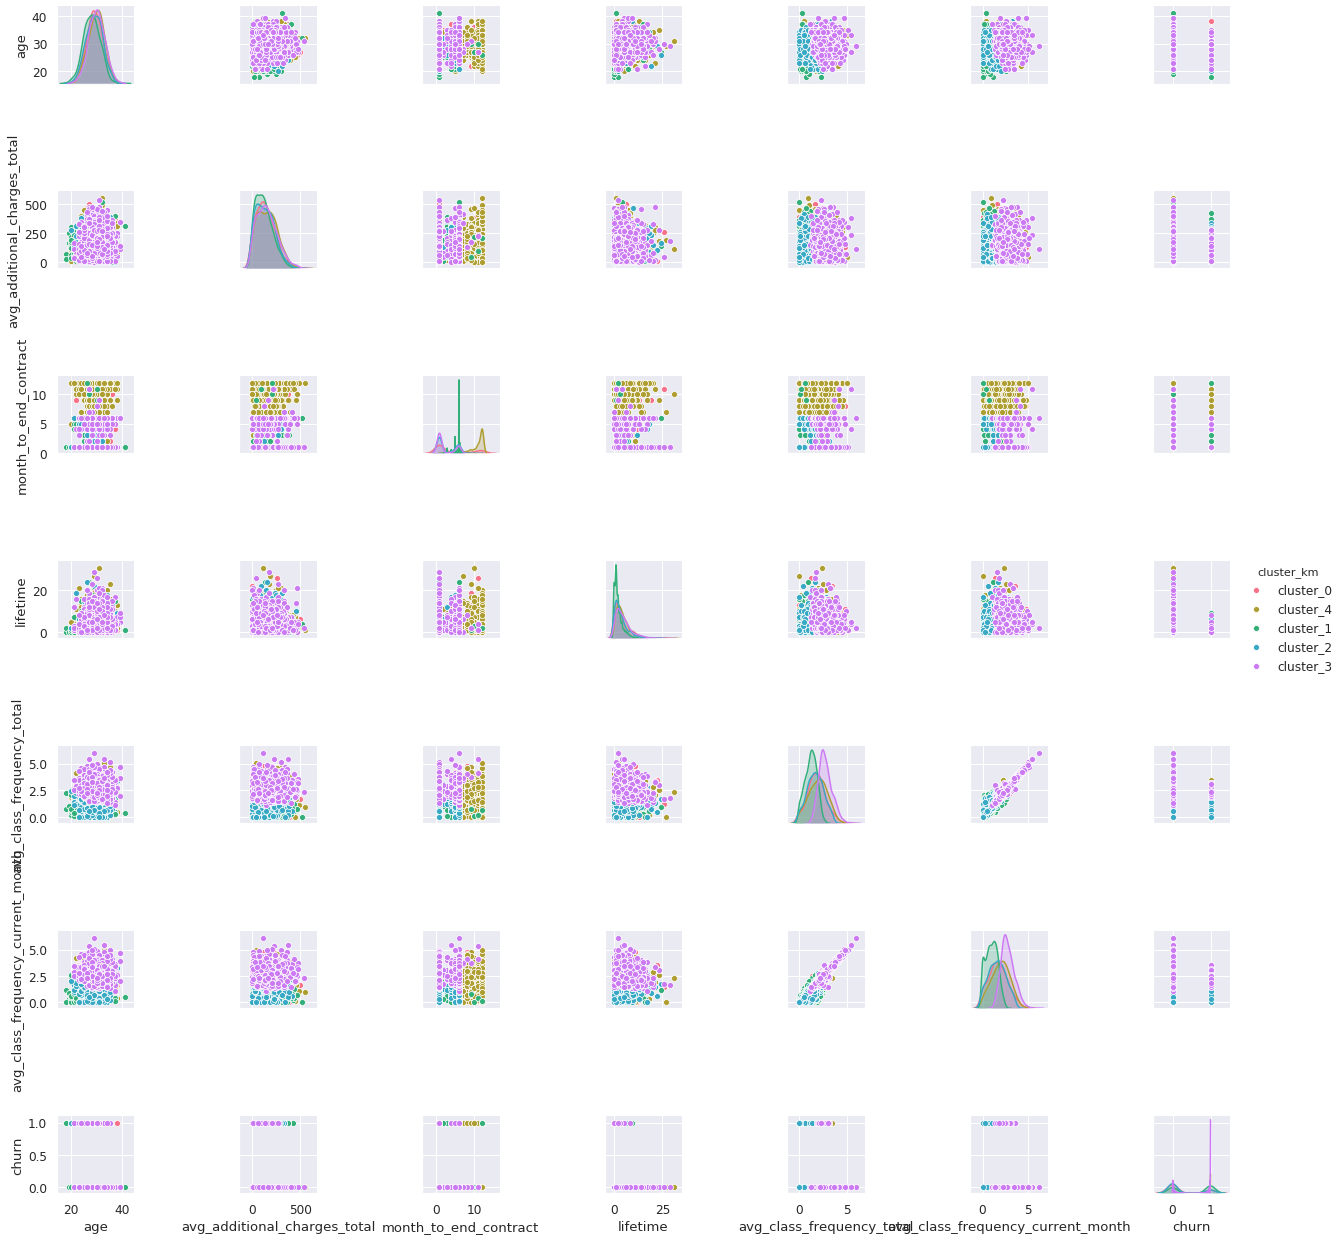

In [61]:
sns.pairplot(claster_df[list_columns_cluster[7:16]],  hue='cluster_km', palette="husl");

## 4. Предложения:

- активная рекламная компания в районе расположения клуба для клиентов живущих рядом
- расширение предложений для стимулирования покупки абонементов максимакльной длительности
- расширение предложения доп услуг внутри клуба
- стимулирование покупки абонементов людьми старше 30 лет